## OSKAR'S CODE

Results:
20-80 split, 500 epochs:

*   Sydney: 
  *   penalty_weight = 0: 5.77% validation error, 0.065% "penalty error"




In [1]:
import sys
import csv
import numpy as np
import matplotlib.pyplot as plt
import time
import tensorflow as tf
#from tensorflow import keras
import keras
from keras import layers, models, regularizers, backend, utils
import keras.backend.tensorflow_backend as tfback
from IPython.display import display, clear_output

Using TensorFlow backend.


### Linking Dataset from Google Drive

In [2]:
tf.test.gpu_device_name()
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### Read Data

In [3]:
files = ["/notebooks/WECs_DataSet/Sydney_Data.csv"]
csvfile = open(files[0])
reader = csv.reader(csvfile, delimiter = ',')
rows = [[float(v) for v in row] for row in reader]
rows = np.asarray(rows, dtype='float32')

*val_ratio* is the ratio of dataset that is used for validation

In [4]:
Xs = rows[:,0:32]
ys = rows[:,32:49]
val_ratio = 0.2
N = Xs.shape[0]
Xs_train = Xs[0:int((1-val_ratio)*N)]
ys_train = ys[0:int((1-val_ratio)*N)]
Xs_val = Xs[int((1-val_ratio)*N):]
ys_val = ys[int((1-val_ratio)*N):]
print(Xs_train.shape,ys_train.shape)
print(ys_val.shape,ys_val.shape)

(57600, 32) (57600, 17)
(14400, 17) (14400, 17)


In [5]:
K = keras.backend

hyperparamter_penalty_weight = 0.1

def custom_loss(y_true,y_pred):
  return K.mean(K.square(y_pred - y_true), axis=-1) + hyperparamter_penalty_weight * K.mean(K.square(K.sum(y_pred[:,0:16], axis=1) - y_pred[:,16]), axis=-1)

def penalty(y_true,y_pred):
  return 100*K.mean(K.abs(K.sum(y_pred[:,0:16], axis=1) - y_pred[:,16])/K.abs(y_pred[:,16]), axis=-1)

inputs = layers.Input(shape=(32,))
d1 = layers.Dense(128, activation = 'relu')(inputs)
d2 = layers.Dense(128, activation = 'relu')(d1)
d3 = layers.Dense(128, activation = 'relu')(d2)
outputs = layers.Dense(17, activation = 'linear')(d3)

simple_model = models.Model(inputs = inputs, outputs = outputs)
simple_model.compile('adam', custom_loss, metrics=['mean_absolute_percentage_error'])
simple_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 17)                2193      
Total params: 39,441
Trainable params: 39,441
Non-trainable params: 0
_________________________________________________________________


### Training

In [6]:
class CustomCallback(keras.callbacks.Callback):
    def on_test_end(self, logs = None):
        clear_output()

loss_hist = simple_model.fit(Xs_train, ys_train, epochs = 3000, validation_data = (Xs_val, ys_val), batch_size=8000)

Train on 57600 samples, validate on 14400 samples
Epoch 1/3000
57600/57600 [==============================] - 0s 8us/step - loss: 138636999793.7778 - mean_absolute_percentage_error: 99.9768 - val_loss: 135679634090.6667 - val_mean_absolute_percentage_error: 99.8856
Epoch 2/3000
57600/57600 [==============================] - 0s 2us/step - loss: 138334372295.1111 - mean_absolute_percentage_error: 99.7409 - val_loss: 135108243911.1111 - val_mean_absolute_percentage_error: 99.3355
Epoch 3/3000
57600/57600 [==============================] - 0s 2us/step - loss: 137429658965.3333 - mean_absolute_percentage_error: 98.7559 - val_loss: 133432817891.5556 - val_mean_absolute_percentage_error: 97.1121
Epoch 4/3000
57600/57600 [==============================] - 0s 2us/step - loss: 135066412145.7778 - mean_absolute_percentage_error: 95.2168 - val_loss: 129786876359.1111 - val_mean_absolute_percentage_error: 91.2432
Epoch 5/3000
57600/57600 [==============================] - 0s 1us/step - loss: 130105

57600/57600 [==============================] - 0s 2us/step - loss: 729495744.0000 - mean_absolute_percentage_error: 7.6906 - val_loss: 1152260337.7778 - val_mean_absolute_percentage_error: 9.4120
Epoch 40/3000
57600/57600 [==============================] - 0s 1us/step - loss: 728706929.7778 - mean_absolute_percentage_error: 7.6894 - val_loss: 1155285105.7778 - val_mean_absolute_percentage_error: 9.4180
Epoch 41/3000
57600/57600 [==============================] - 0s 2us/step - loss: 727891120.0000 - mean_absolute_percentage_error: 7.6857 - val_loss: 1148923406.2222 - val_mean_absolute_percentage_error: 9.4009
Epoch 42/3000
57600/57600 [==============================] - 0s 2us/step - loss: 727124108.4444 - mean_absolute_percentage_error: 7.6828 - val_loss: 1151006321.7778 - val_mean_absolute_percentage_error: 9.4071
Epoch 43/3000
57600/57600 [==============================] - 0s 1us/step - loss: 726388177.7778 - mean_absolute_percentage_error: 7.6816 - val_loss: 1151505137.7778 - val_mea

57600/57600 [==============================] - 0s 1us/step - loss: 705975299.5556 - mean_absolute_percentage_error: 7.6067 - val_loss: 1127018396.4444 - val_mean_absolute_percentage_error: 9.3384
Epoch 79/3000
57600/57600 [==============================] - 0s 1us/step - loss: 705556161.7778 - mean_absolute_percentage_error: 7.6053 - val_loss: 1127308046.2222 - val_mean_absolute_percentage_error: 9.3484
Epoch 80/3000
57600/57600 [==============================] - 0s 1us/step - loss: 705208597.3333 - mean_absolute_percentage_error: 7.6040 - val_loss: 1126410901.3333 - val_mean_absolute_percentage_error: 9.3462
Epoch 81/3000
57600/57600 [==============================] - 0s 1us/step - loss: 704795411.5556 - mean_absolute_percentage_error: 7.6028 - val_loss: 1126146780.4444 - val_mean_absolute_percentage_error: 9.3394
Epoch 82/3000
57600/57600 [==============================] - 0s 1us/step - loss: 704374252.4444 - mean_absolute_percentage_error: 7.6001 - val_loss: 1126784448.0000 - val_mea

Epoch 117/3000
57600/57600 [==============================] - 0s 1us/step - loss: 694266291.5556 - mean_absolute_percentage_error: 7.5473 - val_loss: 1109376263.1111 - val_mean_absolute_percentage_error: 9.2776
Epoch 118/3000
57600/57600 [==============================] - 0s 1us/step - loss: 694114904.8889 - mean_absolute_percentage_error: 7.5442 - val_loss: 1109683370.6667 - val_mean_absolute_percentage_error: 9.2698
Epoch 119/3000
57600/57600 [==============================] - 0s 1us/step - loss: 695396520.8889 - mean_absolute_percentage_error: 7.5475 - val_loss: 1111214904.8889 - val_mean_absolute_percentage_error: 9.1663
Epoch 120/3000
57600/57600 [==============================] - 0s 1us/step - loss: 703785201.7778 - mean_absolute_percentage_error: 7.5560 - val_loss: 1114870741.3333 - val_mean_absolute_percentage_error: 9.3316
Epoch 121/3000
57600/57600 [==============================] - 0s 1us/step - loss: 697281943.1111 - mean_absolute_percentage_error: 7.5524 - val_loss: 110189

Epoch 156/3000
57600/57600 [==============================] - ETA: 0s - loss: 684025920.0000 - mean_absolute_percentage_error: 7.48 - 0s 1us/step - loss: 684263816.8889 - mean_absolute_percentage_error: 7.4834 - val_loss: 1090928832.0000 - val_mean_absolute_percentage_error: 9.2422
Epoch 157/3000
57600/57600 [==============================] - 0s 1us/step - loss: 683791712.0000 - mean_absolute_percentage_error: 7.4846 - val_loss: 1095698055.1111 - val_mean_absolute_percentage_error: 9.2524
Epoch 158/3000
57600/57600 [==============================] - 0s 1us/step - loss: 683542924.4444 - mean_absolute_percentage_error: 7.4814 - val_loss: 1086492302.2222 - val_mean_absolute_percentage_error: 9.2090
Epoch 159/3000
57600/57600 [==============================] - 0s 1us/step - loss: 683554625.7778 - mean_absolute_percentage_error: 7.4804 - val_loss: 1098672206.2222 - val_mean_absolute_percentage_error: 9.2406
Epoch 160/3000
57600/57600 [==============================] - 0s 1us/step - loss: 68

57600/57600 [==============================] - 0s 1us/step - loss: 672864488.8889 - mean_absolute_percentage_error: 7.4165 - val_loss: 1074240128.0000 - val_mean_absolute_percentage_error: 9.2143
Epoch 195/3000
57600/57600 [==============================] - 0s 1us/step - loss: 672172177.7778 - mean_absolute_percentage_error: 7.4138 - val_loss: 1069154951.1111 - val_mean_absolute_percentage_error: 9.1564
Epoch 196/3000
57600/57600 [==============================] - 0s 1us/step - loss: 672351329.7778 - mean_absolute_percentage_error: 7.4119 - val_loss: 1072754339.5556 - val_mean_absolute_percentage_error: 9.1494
Epoch 197/3000
57600/57600 [==============================] - 0s 1us/step - loss: 671481015.1111 - mean_absolute_percentage_error: 7.4105 - val_loss: 1065196565.3333 - val_mean_absolute_percentage_error: 9.1642
Epoch 198/3000
57600/57600 [==============================] - 0s 1us/step - loss: 671160835.5556 - mean_absolute_percentage_error: 7.4103 - val_loss: 1071508764.4444 - val

Epoch 233/3000
57600/57600 [==============================] - 0s 1us/step - loss: 656635153.7778 - mean_absolute_percentage_error: 7.3400 - val_loss: 1037159175.1111 - val_mean_absolute_percentage_error: 9.0638
Epoch 234/3000
57600/57600 [==============================] - 0s 1us/step - loss: 656273152.0000 - mean_absolute_percentage_error: 7.3409 - val_loss: 1041094734.2222 - val_mean_absolute_percentage_error: 9.0852
Epoch 235/3000
57600/57600 [==============================] - 0s 2us/step - loss: 655855953.7778 - mean_absolute_percentage_error: 7.3346 - val_loss: 1050866069.3333 - val_mean_absolute_percentage_error: 9.1492
Epoch 236/3000
57600/57600 [==============================] - 0s 1us/step - loss: 657352554.6667 - mean_absolute_percentage_error: 7.3398 - val_loss: 1036483562.6667 - val_mean_absolute_percentage_error: 9.1410
Epoch 237/3000
57600/57600 [==============================] - 0s 1us/step - loss: 657153792.0000 - mean_absolute_percentage_error: 7.3381 - val_loss: 104341

Epoch 272/3000
57600/57600 [==============================] - 0s 1us/step - loss: 645223376.0000 - mean_absolute_percentage_error: 7.2805 - val_loss: 1023610908.4444 - val_mean_absolute_percentage_error: 9.1217
Epoch 273/3000
57600/57600 [==============================] - 0s 1us/step - loss: 642722769.7778 - mean_absolute_percentage_error: 7.2754 - val_loss: 1025097130.6667 - val_mean_absolute_percentage_error: 9.0212
Epoch 274/3000
57600/57600 [==============================] - 0s 1us/step - loss: 640985425.7778 - mean_absolute_percentage_error: 7.2659 - val_loss: 1021891512.8889 - val_mean_absolute_percentage_error: 9.0213
Epoch 275/3000
57600/57600 [==============================] - 0s 1us/step - loss: 638666007.1111 - mean_absolute_percentage_error: 7.2627 - val_loss: 1010570161.7778 - val_mean_absolute_percentage_error: 9.0278
Epoch 276/3000
57600/57600 [==============================] - 0s 1us/step - loss: 638278931.5556 - mean_absolute_percentage_error: 7.2592 - val_loss: 102895

Epoch 311/3000
57600/57600 [==============================] - 0s 1us/step - loss: 622605427.5556 - mean_absolute_percentage_error: 7.1958 - val_loss: 1010524110.2222 - val_mean_absolute_percentage_error: 9.0192
Epoch 312/3000
57600/57600 [==============================] - 0s 1us/step - loss: 621410535.1111 - mean_absolute_percentage_error: 7.1975 - val_loss: 1004257699.5556 - val_mean_absolute_percentage_error: 9.0135
Epoch 313/3000
57600/57600 [==============================] - 0s 1us/step - loss: 620909891.5556 - mean_absolute_percentage_error: 7.1942 - val_loss: 1013312796.4444 - val_mean_absolute_percentage_error: 9.0471
Epoch 314/3000
57600/57600 [==============================] - 0s 1us/step - loss: 620779704.8889 - mean_absolute_percentage_error: 7.1922 - val_loss: 1006607281.7778 - val_mean_absolute_percentage_error: 9.0316
Epoch 315/3000
57600/57600 [==============================] - 0s 1us/step - loss: 620313024.0000 - mean_absolute_percentage_error: 7.1934 - val_loss: 100730

Epoch 350/3000
57600/57600 [==============================] - 0s 1us/step - loss: 603786266.6667 - mean_absolute_percentage_error: 7.1401 - val_loss: 991788060.4444 - val_mean_absolute_percentage_error: 8.9796
Epoch 351/3000
57600/57600 [==============================] - 0s 1us/step - loss: 603302563.5556 - mean_absolute_percentage_error: 7.1366 - val_loss: 985283349.3333 - val_mean_absolute_percentage_error: 8.9241
Epoch 352/3000
57600/57600 [==============================] - 0s 1us/step - loss: 606477704.8889 - mean_absolute_percentage_error: 7.1435 - val_loss: 994363356.4444 - val_mean_absolute_percentage_error: 8.8654
Epoch 353/3000
57600/57600 [==============================] - 0s 1us/step - loss: 612318716.4444 - mean_absolute_percentage_error: 7.1468 - val_loss: 988787427.5556 - val_mean_absolute_percentage_error: 8.9725
Epoch 354/3000
57600/57600 [==============================] - 0s 1us/step - loss: 603879020.4444 - mean_absolute_percentage_error: 7.1352 - val_loss: 994894336.

57600/57600 [==============================] - 0s 1us/step - loss: 588012791.1111 - mean_absolute_percentage_error: 7.0860 - val_loss: 983541532.4444 - val_mean_absolute_percentage_error: 8.9527
Epoch 390/3000
57600/57600 [==============================] - 0s 1us/step - loss: 587613072.0000 - mean_absolute_percentage_error: 7.0849 - val_loss: 971840490.6667 - val_mean_absolute_percentage_error: 8.9042
Epoch 391/3000
57600/57600 [==============================] - 0s 1us/step - loss: 587589164.4444 - mean_absolute_percentage_error: 7.0826 - val_loss: 976661568.0000 - val_mean_absolute_percentage_error: 8.9120
Epoch 392/3000
57600/57600 [==============================] - 0s 1us/step - loss: 586838888.8889 - mean_absolute_percentage_error: 7.0820 - val_loss: 970358684.4444 - val_mean_absolute_percentage_error: 8.9217
Epoch 393/3000
57600/57600 [==============================] - 0s 1us/step - loss: 586219121.7778 - mean_absolute_percentage_error: 7.0824 - val_loss: 955109852.4444 - val_mean

57600/57600 [==============================] - 0s 1us/step - loss: 573689034.6667 - mean_absolute_percentage_error: 7.0340 - val_loss: 954582691.5556 - val_mean_absolute_percentage_error: 8.8880
Epoch 429/3000
57600/57600 [==============================] - 0s 1us/step - loss: 571902343.1111 - mean_absolute_percentage_error: 7.0315 - val_loss: 954987825.7778 - val_mean_absolute_percentage_error: 8.8426
Epoch 430/3000
57600/57600 [==============================] - 0s 1us/step - loss: 571172112.0000 - mean_absolute_percentage_error: 7.0289 - val_loss: 968717155.5556 - val_mean_absolute_percentage_error: 8.9260
Epoch 431/3000
57600/57600 [==============================] - 0s 1us/step - loss: 571187980.4444 - mean_absolute_percentage_error: 7.0314 - val_loss: 968867975.1111 - val_mean_absolute_percentage_error: 8.8988
Epoch 432/3000
57600/57600 [==============================] - 0s 1us/step - loss: 570172791.1111 - mean_absolute_percentage_error: 7.0292 - val_loss: 964124664.8889 - val_mean

57600/57600 [==============================] - 0s 1us/step - loss: 558617124.4444 - mean_absolute_percentage_error: 6.9816 - val_loss: 944756145.7778 - val_mean_absolute_percentage_error: 8.7862
Epoch 468/3000
57600/57600 [==============================] - 0s 1us/step - loss: 560110855.1111 - mean_absolute_percentage_error: 6.9841 - val_loss: 939218716.4444 - val_mean_absolute_percentage_error: 8.7588
Epoch 469/3000
57600/57600 [==============================] - 0s 1us/step - loss: 559596120.8889 - mean_absolute_percentage_error: 6.9792 - val_loss: 939943324.4444 - val_mean_absolute_percentage_error: 8.8076
Epoch 470/3000
57600/57600 [==============================] - 0s 1us/step - loss: 556303799.1111 - mean_absolute_percentage_error: 6.9767 - val_loss: 945617557.3333 - val_mean_absolute_percentage_error: 8.8438
Epoch 471/3000
57600/57600 [==============================] - 0s 2us/step - loss: 555880776.8889 - mean_absolute_percentage_error: 6.9759 - val_loss: 942565909.3333 - val_mean

57600/57600 [==============================] - 0s 1us/step - loss: 544149249.7778 - mean_absolute_percentage_error: 6.9246 - val_loss: 929760007.1111 - val_mean_absolute_percentage_error: 8.7729
Epoch 507/3000
57600/57600 [==============================] - 0s 1us/step - loss: 543009656.0000 - mean_absolute_percentage_error: 6.9248 - val_loss: 924444017.7778 - val_mean_absolute_percentage_error: 8.7615
Epoch 508/3000
57600/57600 [==============================] - 0s 1us/step - loss: 542883189.3333 - mean_absolute_percentage_error: 6.9240 - val_loss: 920531100.4444 - val_mean_absolute_percentage_error: 8.7424
Epoch 509/3000
57600/57600 [==============================] - 0s 1us/step - loss: 542682310.2222 - mean_absolute_percentage_error: 6.9232 - val_loss: 917778183.1111 - val_mean_absolute_percentage_error: 8.7316
Epoch 510/3000
57600/57600 [==============================] - 0s 1us/step - loss: 542791532.4444 - mean_absolute_percentage_error: 6.9231 - val_loss: 919484032.0000 - val_mean

57600/57600 [==============================] - 0s 1us/step - loss: 530463123.5556 - mean_absolute_percentage_error: 6.8696 - val_loss: 911685191.1111 - val_mean_absolute_percentage_error: 8.7154
Epoch 546/3000
57600/57600 [==============================] - 0s 1us/step - loss: 530929499.5556 - mean_absolute_percentage_error: 6.8700 - val_loss: 919978524.4444 - val_mean_absolute_percentage_error: 8.7594
Epoch 547/3000
57600/57600 [==============================] - 0s 1us/step - loss: 531360382.2222 - mean_absolute_percentage_error: 6.8714 - val_loss: 926998620.4444 - val_mean_absolute_percentage_error: 8.7781
Epoch 548/3000
57600/57600 [==============================] - 0s 1us/step - loss: 530008688.8889 - mean_absolute_percentage_error: 6.8699 - val_loss: 928032049.7778 - val_mean_absolute_percentage_error: 8.7746
Epoch 549/3000
57600/57600 [==============================] - 0s 1us/step - loss: 529917921.7778 - mean_absolute_percentage_error: 6.8687 - val_loss: 924073251.5556 - val_mean

57600/57600 [==============================] - 0s 1us/step - loss: 514014777.7778 - mean_absolute_percentage_error: 6.8013 - val_loss: 888015566.2222 - val_mean_absolute_percentage_error: 8.6174
Epoch 585/3000
57600/57600 [==============================] - 0s 1us/step - loss: 515447908.4444 - mean_absolute_percentage_error: 6.7973 - val_loss: 900996501.3333 - val_mean_absolute_percentage_error: 8.6237
Epoch 586/3000
57600/57600 [==============================] - 0s 1us/step - loss: 516136973.3333 - mean_absolute_percentage_error: 6.8001 - val_loss: 901432952.8889 - val_mean_absolute_percentage_error: 8.6321
Epoch 587/3000
57600/57600 [==============================] - 0s 1us/step - loss: 512996920.0000 - mean_absolute_percentage_error: 6.7917 - val_loss: 901332174.2222 - val_mean_absolute_percentage_error: 8.6876
Epoch 588/3000
57600/57600 [==============================] - 0s 1us/step - loss: 512647988.4444 - mean_absolute_percentage_error: 6.7943 - val_loss: 895687793.7778 - val_mean

57600/57600 [==============================] - 0s 1us/step - loss: 497305240.0000 - mean_absolute_percentage_error: 6.7198 - val_loss: 874802218.6667 - val_mean_absolute_percentage_error: 8.6112
Epoch 624/3000
57600/57600 [==============================] - 0s 1us/step - loss: 496412529.7778 - mean_absolute_percentage_error: 6.7168 - val_loss: 873281123.5556 - val_mean_absolute_percentage_error: 8.5864
Epoch 625/3000
57600/57600 [==============================] - 0s 1us/step - loss: 494642411.5556 - mean_absolute_percentage_error: 6.7102 - val_loss: 879207815.1111 - val_mean_absolute_percentage_error: 8.5751
Epoch 626/3000
57600/57600 [==============================] - 0s 1us/step - loss: 495195286.2222 - mean_absolute_percentage_error: 6.7117 - val_loss: 864507832.8889 - val_mean_absolute_percentage_error: 8.5208
Epoch 627/3000
57600/57600 [==============================] - 0s 1us/step - loss: 495000832.0000 - mean_absolute_percentage_error: 6.7043 - val_loss: 872181937.7778 - val_mean

57600/57600 [==============================] - 0s 1us/step - loss: 483892855.1111 - mean_absolute_percentage_error: 6.6413 - val_loss: 840932899.5556 - val_mean_absolute_percentage_error: 8.4825
Epoch 663/3000
57600/57600 [==============================] - 0s 1us/step - loss: 476971837.3333 - mean_absolute_percentage_error: 6.6157 - val_loss: 860503217.7778 - val_mean_absolute_percentage_error: 8.4977
Epoch 664/3000
57600/57600 [==============================] - 0s 1us/step - loss: 475222122.6667 - mean_absolute_percentage_error: 6.6146 - val_loss: 855569045.3333 - val_mean_absolute_percentage_error: 8.5422
Epoch 665/3000
57600/57600 [==============================] - 0s 1us/step - loss: 474602635.5556 - mean_absolute_percentage_error: 6.6125 - val_loss: 847014208.0000 - val_mean_absolute_percentage_error: 8.4638
Epoch 666/3000
57600/57600 [==============================] - 0s 1us/step - loss: 473457648.8889 - mean_absolute_percentage_error: 6.6063 - val_loss: 854041351.1111 - val_mean

57600/57600 [==============================] - 0s 1us/step - loss: 455639176.8889 - mean_absolute_percentage_error: 6.5105 - val_loss: 816981688.8889 - val_mean_absolute_percentage_error: 8.3913
Epoch 702/3000
57600/57600 [==============================] - 0s 1us/step - loss: 455632342.2222 - mean_absolute_percentage_error: 6.5026 - val_loss: 840543886.2222 - val_mean_absolute_percentage_error: 8.5003
Epoch 703/3000
57600/57600 [==============================] - 0s 1us/step - loss: 455825030.2222 - mean_absolute_percentage_error: 6.5085 - val_loss: 820510272.0000 - val_mean_absolute_percentage_error: 8.4250
Epoch 704/3000
57600/57600 [==============================] - 0s 1us/step - loss: 456309952.0000 - mean_absolute_percentage_error: 6.5032 - val_loss: 837087516.4444 - val_mean_absolute_percentage_error: 8.4968
Epoch 705/3000
57600/57600 [==============================] - 0s 1us/step - loss: 453809688.0000 - mean_absolute_percentage_error: 6.4944 - val_loss: 820714304.0000 - val_mean

57600/57600 [==============================] - 0s 1us/step - loss: 434674623.1111 - mean_absolute_percentage_error: 6.3805 - val_loss: 816080533.3333 - val_mean_absolute_percentage_error: 8.3738
Epoch 741/3000
57600/57600 [==============================] - 0s 1us/step - loss: 433898469.3333 - mean_absolute_percentage_error: 6.3817 - val_loss: 812200177.7778 - val_mean_absolute_percentage_error: 8.3764
Epoch 742/3000
57600/57600 [==============================] - 0s 1us/step - loss: 432431943.1111 - mean_absolute_percentage_error: 6.3683 - val_loss: 839137720.8889 - val_mean_absolute_percentage_error: 8.5140
Epoch 743/3000
57600/57600 [==============================] - 0s 1us/step - loss: 434577217.7778 - mean_absolute_percentage_error: 6.3851 - val_loss: 799032533.3333 - val_mean_absolute_percentage_error: 8.3642
Epoch 744/3000
57600/57600 [==============================] - 0s 1us/step - loss: 435227709.3333 - mean_absolute_percentage_error: 6.3692 - val_loss: 837629262.2222 - val_mean

57600/57600 [==============================] - 0s 1us/step - loss: 411438256.8889 - mean_absolute_percentage_error: 6.2335 - val_loss: 813902584.8889 - val_mean_absolute_percentage_error: 8.4176
Epoch 780/3000
57600/57600 [==============================] - 0s 1us/step - loss: 408794062.2222 - mean_absolute_percentage_error: 6.2276 - val_loss: 805146965.3333 - val_mean_absolute_percentage_error: 8.3442
Epoch 781/3000
57600/57600 [==============================] - 0s 1us/step - loss: 407317432.0000 - mean_absolute_percentage_error: 6.2178 - val_loss: 801657464.8889 - val_mean_absolute_percentage_error: 8.3645
Epoch 782/3000
57600/57600 [==============================] - 0s 1us/step - loss: 406448842.6667 - mean_absolute_percentage_error: 6.2102 - val_loss: 813601479.1111 - val_mean_absolute_percentage_error: 8.4082
Epoch 783/3000
57600/57600 [==============================] - 0s 1us/step - loss: 405734449.7778 - mean_absolute_percentage_error: 6.2118 - val_loss: 791814776.8889 - val_mean

57600/57600 [==============================] - 0s 1us/step - loss: 379976147.5556 - mean_absolute_percentage_error: 6.0360 - val_loss: 807393664.0000 - val_mean_absolute_percentage_error: 8.3588
Epoch 819/3000
57600/57600 [==============================] - 0s 1us/step - loss: 379916262.2222 - mean_absolute_percentage_error: 6.0433 - val_loss: 761981589.3333 - val_mean_absolute_percentage_error: 8.1937
Epoch 820/3000
57600/57600 [==============================] - 0s 1us/step - loss: 380282880.8889 - mean_absolute_percentage_error: 6.0424 - val_loss: 754032071.1111 - val_mean_absolute_percentage_error: 8.1643
Epoch 821/3000
57600/57600 [==============================] - 0s 1us/step - loss: 377465497.7778 - mean_absolute_percentage_error: 6.0196 - val_loss: 795320689.7778 - val_mean_absolute_percentage_error: 8.3438
Epoch 822/3000
57600/57600 [==============================] - 0s 1us/step - loss: 378641113.7778 - mean_absolute_percentage_error: 6.0283 - val_loss: 796242410.6667 - val_mean

57600/57600 [==============================] - 0s 1us/step - loss: 353498658.6667 - mean_absolute_percentage_error: 5.8572 - val_loss: 753125752.8889 - val_mean_absolute_percentage_error: 8.1207
Epoch 858/3000
57600/57600 [==============================] - 0s 1us/step - loss: 351902404.4444 - mean_absolute_percentage_error: 5.8433 - val_loss: 723927232.0000 - val_mean_absolute_percentage_error: 8.0498
Epoch 859/3000
57600/57600 [==============================] - 0s 1us/step - loss: 352455402.6667 - mean_absolute_percentage_error: 5.8423 - val_loss: 736831381.3333 - val_mean_absolute_percentage_error: 8.1050
Epoch 860/3000
57600/57600 [==============================] - 0s 1us/step - loss: 350048624.8889 - mean_absolute_percentage_error: 5.8282 - val_loss: 743536327.1111 - val_mean_absolute_percentage_error: 8.1210
Epoch 861/3000
57600/57600 [==============================] - 0s 1us/step - loss: 348987895.1111 - mean_absolute_percentage_error: 5.8233 - val_loss: 736580814.2222 - val_mean

57600/57600 [==============================] - 0s 1us/step - loss: 328657267.5556 - mean_absolute_percentage_error: 5.6681 - val_loss: 736130503.1111 - val_mean_absolute_percentage_error: 8.0912
Epoch 897/3000
57600/57600 [==============================] - 0s 1us/step - loss: 327818152.0000 - mean_absolute_percentage_error: 5.6647 - val_loss: 715327459.5556 - val_mean_absolute_percentage_error: 8.0039
Epoch 898/3000
57600/57600 [==============================] - 0s 1us/step - loss: 326670142.2222 - mean_absolute_percentage_error: 5.6524 - val_loss: 719820892.4444 - val_mean_absolute_percentage_error: 8.0068
Epoch 899/3000
57600/57600 [==============================] - 0s 1us/step - loss: 326154694.2222 - mean_absolute_percentage_error: 5.6468 - val_loss: 717277660.4444 - val_mean_absolute_percentage_error: 7.9707
Epoch 900/3000
57600/57600 [==============================] - 0s 1us/step - loss: 327719649.7778 - mean_absolute_percentage_error: 5.6436 - val_loss: 712328512.0000 - val_mean

57600/57600 [==============================] - 0s 1us/step - loss: 308703392.0000 - mean_absolute_percentage_error: 5.4992 - val_loss: 695415132.4444 - val_mean_absolute_percentage_error: 7.9239
Epoch 936/3000
57600/57600 [==============================] - 0s 1us/step - loss: 308604524.4444 - mean_absolute_percentage_error: 5.4967 - val_loss: 685294549.3333 - val_mean_absolute_percentage_error: 7.8794
Epoch 937/3000
57600/57600 [==============================] - 0s 1us/step - loss: 308227981.3333 - mean_absolute_percentage_error: 5.4907 - val_loss: 728024120.8889 - val_mean_absolute_percentage_error: 8.0257
Epoch 938/3000
57600/57600 [==============================] - 0s 1us/step - loss: 311648585.7778 - mean_absolute_percentage_error: 5.5068 - val_loss: 714438030.2222 - val_mean_absolute_percentage_error: 7.9771
Epoch 939/3000
57600/57600 [==============================] - 0s 1us/step - loss: 309307465.7778 - mean_absolute_percentage_error: 5.4942 - val_loss: 724006535.1111 - val_mean

57600/57600 [==============================] - 0s 1us/step - loss: 294356541.3333 - mean_absolute_percentage_error: 5.3179 - val_loss: 667018958.2222 - val_mean_absolute_percentage_error: 7.7810
Epoch 975/3000
57600/57600 [==============================] - 0s 1us/step - loss: 293432217.7778 - mean_absolute_percentage_error: 5.3172 - val_loss: 678536782.2222 - val_mean_absolute_percentage_error: 7.8609
Epoch 976/3000
57600/57600 [==============================] - 0s 1us/step - loss: 294595235.5556 - mean_absolute_percentage_error: 5.3193 - val_loss: 657558229.3333 - val_mean_absolute_percentage_error: 7.7748
Epoch 977/3000
57600/57600 [==============================] - 0s 1us/step - loss: 293220941.3333 - mean_absolute_percentage_error: 5.3104 - val_loss: 634799324.4444 - val_mean_absolute_percentage_error: 7.6225
Epoch 978/3000
57600/57600 [==============================] - 0s 1us/step - loss: 294032695.1111 - mean_absolute_percentage_error: 5.3065 - val_loss: 627501824.0000 - val_mean

57600/57600 [==============================] - 0s 1us/step - loss: 281683414.2222 - mean_absolute_percentage_error: 5.1381 - val_loss: 622826929.7778 - val_mean_absolute_percentage_error: 7.5839
Epoch 1014/3000
57600/57600 [==============================] - 0s 1us/step - loss: 280904244.4444 - mean_absolute_percentage_error: 5.1339 - val_loss: 623214328.8889 - val_mean_absolute_percentage_error: 7.6025
Epoch 1015/3000
57600/57600 [==============================] - 0s 1us/step - loss: 281802085.3333 - mean_absolute_percentage_error: 5.1328 - val_loss: 633552192.0000 - val_mean_absolute_percentage_error: 7.6788
Epoch 1016/3000
57600/57600 [==============================] - 0s 1us/step - loss: 284716618.6667 - mean_absolute_percentage_error: 5.1409 - val_loss: 626139072.0000 - val_mean_absolute_percentage_error: 7.6502
Epoch 1017/3000
57600/57600 [==============================] - 0s 1us/step - loss: 281272106.6667 - mean_absolute_percentage_error: 5.1254 - val_loss: 636590449.7778 - val_

Epoch 1052/3000
57600/57600 [==============================] - 0s 1us/step - loss: 272503920.8889 - mean_absolute_percentage_error: 5.0119 - val_loss: 599648753.7778 - val_mean_absolute_percentage_error: 7.3913
Epoch 1053/3000
57600/57600 [==============================] - 0s 1us/step - loss: 275068983.1111 - mean_absolute_percentage_error: 5.0181 - val_loss: 616157475.5556 - val_mean_absolute_percentage_error: 7.4312
Epoch 1054/3000
57600/57600 [==============================] - 0s 1us/step - loss: 273184655.5556 - mean_absolute_percentage_error: 5.0112 - val_loss: 604117511.1111 - val_mean_absolute_percentage_error: 7.5055
Epoch 1055/3000
57600/57600 [==============================] - 0s 1us/step - loss: 272539031.5556 - mean_absolute_percentage_error: 5.0084 - val_loss: 598279644.4444 - val_mean_absolute_percentage_error: 7.4787
Epoch 1056/3000
57600/57600 [==============================] - 0s 1us/step - loss: 271231455.5556 - mean_absolute_percentage_error: 5.0019 - val_loss: 59607

Epoch 1091/3000
57600/57600 [==============================] - 0s 1us/step - loss: 264378799.1111 - mean_absolute_percentage_error: 4.9131 - val_loss: 571034730.6667 - val_mean_absolute_percentage_error: 7.3220
Epoch 1092/3000
57600/57600 [==============================] - 0s 1us/step - loss: 264056286.6667 - mean_absolute_percentage_error: 4.9094 - val_loss: 570407288.8889 - val_mean_absolute_percentage_error: 7.3065
Epoch 1093/3000
57600/57600 [==============================] - 0s 1us/step - loss: 263982728.8889 - mean_absolute_percentage_error: 4.9077 - val_loss: 572435825.7778 - val_mean_absolute_percentage_error: 7.3178
Epoch 1094/3000
57600/57600 [==============================] - 0s 1us/step - loss: 263860732.4444 - mean_absolute_percentage_error: 4.9047 - val_loss: 571733923.5556 - val_mean_absolute_percentage_error: 7.3175
Epoch 1095/3000
57600/57600 [==============================] - 0s 1us/step - loss: 263844152.0000 - mean_absolute_percentage_error: 4.9057 - val_loss: 56531

Epoch 1130/3000
57600/57600 [==============================] - 0s 1us/step - loss: 258167201.3333 - mean_absolute_percentage_error: 4.8258 - val_loss: 573903623.1111 - val_mean_absolute_percentage_error: 7.3411
Epoch 1131/3000
57600/57600 [==============================] - 0s 1us/step - loss: 257177090.2222 - mean_absolute_percentage_error: 4.8221 - val_loss: 577911232.0000 - val_mean_absolute_percentage_error: 7.3201
Epoch 1132/3000
57600/57600 [==============================] - 0s 1us/step - loss: 257142638.6667 - mean_absolute_percentage_error: 4.8200 - val_loss: 557390087.1111 - val_mean_absolute_percentage_error: 7.2407
Epoch 1133/3000
57600/57600 [==============================] - 0s 2us/step - loss: 256793792.4444 - mean_absolute_percentage_error: 4.8173 - val_loss: 547255765.3333 - val_mean_absolute_percentage_error: 7.1905
Epoch 1134/3000
57600/57600 [==============================] - 0s 1us/step - loss: 256869561.3333 - mean_absolute_percentage_error: 4.8167 - val_loss: 55601

Epoch 1169/3000
57600/57600 [==============================] - 0s 1us/step - loss: 250619097.3333 - mean_absolute_percentage_error: 4.7416 - val_loss: 562086488.8889 - val_mean_absolute_percentage_error: 7.2293
Epoch 1170/3000
57600/57600 [==============================] - 0s 1us/step - loss: 250860994.6667 - mean_absolute_percentage_error: 4.7410 - val_loss: 564412021.3333 - val_mean_absolute_percentage_error: 7.2125
Epoch 1171/3000
57600/57600 [==============================] - 0s 1us/step - loss: 253475572.8889 - mean_absolute_percentage_error: 4.7467 - val_loss: 569612419.5556 - val_mean_absolute_percentage_error: 7.1348
Epoch 1172/3000
57600/57600 [==============================] - 0s 1us/step - loss: 258738176.0000 - mean_absolute_percentage_error: 4.7600 - val_loss: 561030588.4444 - val_mean_absolute_percentage_error: 7.2286
Epoch 1173/3000
57600/57600 [==============================] - 0s 1us/step - loss: 252410278.2222 - mean_absolute_percentage_error: 4.7420 - val_loss: 54361

Epoch 1208/3000
57600/57600 [==============================] - 0s 1us/step - loss: 244753792.4444 - mean_absolute_percentage_error: 4.6657 - val_loss: 553081774.2222 - val_mean_absolute_percentage_error: 7.1914
Epoch 1209/3000
57600/57600 [==============================] - 0s 1us/step - loss: 245117055.5556 - mean_absolute_percentage_error: 4.6635 - val_loss: 560438652.4444 - val_mean_absolute_percentage_error: 7.2103
Epoch 1210/3000
57600/57600 [==============================] - 0s 1us/step - loss: 245012428.8889 - mean_absolute_percentage_error: 4.6662 - val_loss: 563770293.3333 - val_mean_absolute_percentage_error: 7.2179
Epoch 1211/3000
57600/57600 [==============================] - 0s 1us/step - loss: 244906291.5556 - mean_absolute_percentage_error: 4.6634 - val_loss: 533077091.5556 - val_mean_absolute_percentage_error: 7.1004
Epoch 1212/3000
57600/57600 [==============================] - 0s 1us/step - loss: 245714062.6667 - mean_absolute_percentage_error: 4.6654 - val_loss: 54088

Epoch 1247/3000
57600/57600 [==============================] - 0s 1us/step - loss: 241162364.8889 - mean_absolute_percentage_error: 4.6053 - val_loss: 554891445.3333 - val_mean_absolute_percentage_error: 7.1773
Epoch 1248/3000
57600/57600 [==============================] - 0s 1us/step - loss: 240448676.0000 - mean_absolute_percentage_error: 4.5974 - val_loss: 546505148.4444 - val_mean_absolute_percentage_error: 7.1337
Epoch 1249/3000
57600/57600 [==============================] - 0s 1us/step - loss: 239562604.8889 - mean_absolute_percentage_error: 4.5919 - val_loss: 551115086.2222 - val_mean_absolute_percentage_error: 7.1212
Epoch 1250/3000
57600/57600 [==============================] - 0s 1us/step - loss: 239669699.5556 - mean_absolute_percentage_error: 4.5908 - val_loss: 548293596.4444 - val_mean_absolute_percentage_error: 7.0970
Epoch 1251/3000
57600/57600 [==============================] - 0s 1us/step - loss: 239910842.6667 - mean_absolute_percentage_error: 4.5902 - val_loss: 55296

Epoch 1286/3000
57600/57600 [==============================] - 0s 1us/step - loss: 234953418.6667 - mean_absolute_percentage_error: 4.5195 - val_loss: 521170922.6667 - val_mean_absolute_percentage_error: 6.9695
Epoch 1287/3000
57600/57600 [==============================] - 0s 1us/step - loss: 234658883.1111 - mean_absolute_percentage_error: 4.5169 - val_loss: 529415715.5556 - val_mean_absolute_percentage_error: 7.0025
Epoch 1288/3000
57600/57600 [==============================] - 0s 1us/step - loss: 234167570.6667 - mean_absolute_percentage_error: 4.5138 - val_loss: 529861486.2222 - val_mean_absolute_percentage_error: 7.0047
Epoch 1289/3000
57600/57600 [==============================] - 0s 1us/step - loss: 234170436.4444 - mean_absolute_percentage_error: 4.5124 - val_loss: 538755836.4444 - val_mean_absolute_percentage_error: 7.0424
Epoch 1290/3000
57600/57600 [==============================] - 0s 1us/step - loss: 234437172.8889 - mean_absolute_percentage_error: 4.5134 - val_loss: 52780

Epoch 1325/3000
57600/57600 [==============================] - 0s 1us/step - loss: 231038344.8889 - mean_absolute_percentage_error: 4.4525 - val_loss: 514557923.5556 - val_mean_absolute_percentage_error: 6.8750
Epoch 1326/3000
57600/57600 [==============================] - 0s 1us/step - loss: 230200666.2222 - mean_absolute_percentage_error: 4.4464 - val_loss: 529311573.3333 - val_mean_absolute_percentage_error: 6.9306
Epoch 1327/3000
57600/57600 [==============================] - 0s 1us/step - loss: 230009571.5556 - mean_absolute_percentage_error: 4.4442 - val_loss: 531589628.4444 - val_mean_absolute_percentage_error: 6.9582
Epoch 1328/3000
57600/57600 [==============================] - 0s 1us/step - loss: 230496072.8889 - mean_absolute_percentage_error: 4.4470 - val_loss: 511454040.8889 - val_mean_absolute_percentage_error: 6.8623
Epoch 1329/3000
57600/57600 [==============================] - 0s 1us/step - loss: 230008769.7778 - mean_absolute_percentage_error: 4.4428 - val_loss: 50318

Epoch 1364/3000
57600/57600 [==============================] - 0s 1us/step - loss: 228914855.5556 - mean_absolute_percentage_error: 4.4056 - val_loss: 491701187.5556 - val_mean_absolute_percentage_error: 6.7438
Epoch 1365/3000
57600/57600 [==============================] - 0s 1us/step - loss: 228182888.8889 - mean_absolute_percentage_error: 4.3993 - val_loss: 497887448.8889 - val_mean_absolute_percentage_error: 6.7665
Epoch 1366/3000
57600/57600 [==============================] - 0s 1us/step - loss: 227276075.5556 - mean_absolute_percentage_error: 4.3962 - val_loss: 498743925.3333 - val_mean_absolute_percentage_error: 6.7986
Epoch 1367/3000
57600/57600 [==============================] - 0s 1us/step - loss: 227554416.4444 - mean_absolute_percentage_error: 4.3943 - val_loss: 502388977.7778 - val_mean_absolute_percentage_error: 6.7998
Epoch 1368/3000
57600/57600 [==============================] - 0s 1us/step - loss: 225779787.5556 - mean_absolute_percentage_error: 4.3840 - val_loss: 51132

Epoch 1403/3000
57600/57600 [==============================] - 0s 1us/step - loss: 223695352.4444 - mean_absolute_percentage_error: 4.3396 - val_loss: 489889123.5556 - val_mean_absolute_percentage_error: 6.7087
Epoch 1404/3000
57600/57600 [==============================] - 0s 1us/step - loss: 223541141.7778 - mean_absolute_percentage_error: 4.3410 - val_loss: 497567701.3333 - val_mean_absolute_percentage_error: 6.7582
Epoch 1405/3000
57600/57600 [==============================] - 0s 1us/step - loss: 223752520.4444 - mean_absolute_percentage_error: 4.3409 - val_loss: 498628736.0000 - val_mean_absolute_percentage_error: 6.7671
Epoch 1406/3000
57600/57600 [==============================] - 0s 1us/step - loss: 222930430.6667 - mean_absolute_percentage_error: 4.3352 - val_loss: 501370339.5556 - val_mean_absolute_percentage_error: 6.7791
Epoch 1407/3000
57600/57600 [==============================] - 0s 1us/step - loss: 222812753.3333 - mean_absolute_percentage_error: 4.3334 - val_loss: 50151

Epoch 1442/3000
57600/57600 [==============================] - 0s 1us/step - loss: 220764718.6667 - mean_absolute_percentage_error: 4.3015 - val_loss: 507883470.2222 - val_mean_absolute_percentage_error: 6.7678
Epoch 1443/3000
57600/57600 [==============================] - 0s 1us/step - loss: 220034681.3333 - mean_absolute_percentage_error: 4.2992 - val_loss: 511525020.4444 - val_mean_absolute_percentage_error: 6.7885
Epoch 1444/3000
57600/57600 [==============================] - 0s 1us/step - loss: 219571067.1111 - mean_absolute_percentage_error: 4.2942 - val_loss: 517944867.5556 - val_mean_absolute_percentage_error: 6.8197
Epoch 1445/3000
57600/57600 [==============================] - 0s 1us/step - loss: 219968895.5556 - mean_absolute_percentage_error: 4.2960 - val_loss: 517980810.6667 - val_mean_absolute_percentage_error: 6.8410
Epoch 1446/3000
57600/57600 [==============================] - 0s 1us/step - loss: 220409358.2222 - mean_absolute_percentage_error: 4.2976 - val_loss: 51285

Epoch 1481/3000
57600/57600 [==============================] - 0s 1us/step - loss: 216097651.1111 - mean_absolute_percentage_error: 4.2555 - val_loss: 502100842.6667 - val_mean_absolute_percentage_error: 6.7254
Epoch 1482/3000
57600/57600 [==============================] - 0s 1us/step - loss: 215967584.8889 - mean_absolute_percentage_error: 4.2546 - val_loss: 497425852.4444 - val_mean_absolute_percentage_error: 6.7000
Epoch 1483/3000
57600/57600 [==============================] - 0s 1us/step - loss: 215880055.5556 - mean_absolute_percentage_error: 4.2538 - val_loss: 510254236.4444 - val_mean_absolute_percentage_error: 6.7531
Epoch 1484/3000
57600/57600 [==============================] - 0s 1us/step - loss: 216515020.8889 - mean_absolute_percentage_error: 4.2564 - val_loss: 512318204.4444 - val_mean_absolute_percentage_error: 6.7617
Epoch 1485/3000
57600/57600 [==============================] - 0s 1us/step - loss: 216828712.0000 - mean_absolute_percentage_error: 4.2588 - val_loss: 49057

Epoch 1520/3000
57600/57600 [==============================] - 0s 2us/step - loss: 216545022.2222 - mean_absolute_percentage_error: 4.2408 - val_loss: 488154485.3333 - val_mean_absolute_percentage_error: 6.5802
Epoch 1521/3000
57600/57600 [==============================] - 0s 1us/step - loss: 213758979.5556 - mean_absolute_percentage_error: 4.2259 - val_loss: 497802211.5556 - val_mean_absolute_percentage_error: 6.7012
Epoch 1522/3000
57600/57600 [==============================] - 0s 1us/step - loss: 213758198.2222 - mean_absolute_percentage_error: 4.2261 - val_loss: 496183491.5556 - val_mean_absolute_percentage_error: 6.6880
Epoch 1523/3000
57600/57600 [==============================] - 0s 1us/step - loss: 212950788.4444 - mean_absolute_percentage_error: 4.2206 - val_loss: 519237795.5556 - val_mean_absolute_percentage_error: 6.7530
Epoch 1524/3000
57600/57600 [==============================] - 0s 1us/step - loss: 214172148.8889 - mean_absolute_percentage_error: 4.2292 - val_loss: 51010

Epoch 1559/3000
57600/57600 [==============================] - 0s 1us/step - loss: 210781635.1111 - mean_absolute_percentage_error: 4.1969 - val_loss: 489802147.5556 - val_mean_absolute_percentage_error: 6.6180
Epoch 1560/3000
57600/57600 [==============================] - 0s 1us/step - loss: 210100667.5556 - mean_absolute_percentage_error: 4.1936 - val_loss: 483010005.3333 - val_mean_absolute_percentage_error: 6.5969
Epoch 1561/3000
57600/57600 [==============================] - 0s 1us/step - loss: 209830894.2222 - mean_absolute_percentage_error: 4.1904 - val_loss: 483084423.1111 - val_mean_absolute_percentage_error: 6.5868
Epoch 1562/3000
57600/57600 [==============================] - 0s 1us/step - loss: 209860504.8889 - mean_absolute_percentage_error: 4.1908 - val_loss: 481850876.4444 - val_mean_absolute_percentage_error: 6.5850
Epoch 1563/3000
57600/57600 [==============================] - 0s 1us/step - loss: 210045586.2222 - mean_absolute_percentage_error: 4.1926 - val_loss: 48194

Epoch 1598/3000
57600/57600 [==============================] - 0s 1us/step - loss: 207901984.0000 - mean_absolute_percentage_error: 4.1703 - val_loss: 497866705.7778 - val_mean_absolute_percentage_error: 6.6122
Epoch 1599/3000
57600/57600 [==============================] - 0s 1us/step - loss: 208045589.3333 - mean_absolute_percentage_error: 4.1695 - val_loss: 506337909.3333 - val_mean_absolute_percentage_error: 6.6695
Epoch 1600/3000
57600/57600 [==============================] - 0s 1us/step - loss: 209431204.0000 - mean_absolute_percentage_error: 4.1790 - val_loss: 498089376.0000 - val_mean_absolute_percentage_error: 6.6549
Epoch 1601/3000
57600/57600 [==============================] - 0s 1us/step - loss: 208938600.8889 - mean_absolute_percentage_error: 4.1764 - val_loss: 474060928.0000 - val_mean_absolute_percentage_error: 6.5576
Epoch 1602/3000
57600/57600 [==============================] - 0s 1us/step - loss: 209399651.1111 - mean_absolute_percentage_error: 4.1758 - val_loss: 48600

Epoch 1637/3000
57600/57600 [==============================] - 0s 2us/step - loss: 204605053.7778 - mean_absolute_percentage_error: 4.1387 - val_loss: 473000529.7778 - val_mean_absolute_percentage_error: 6.4939
Epoch 1638/3000
57600/57600 [==============================] - 0s 1us/step - loss: 204609935.1111 - mean_absolute_percentage_error: 4.1385 - val_loss: 495964391.1111 - val_mean_absolute_percentage_error: 6.5869
Epoch 1639/3000
57600/57600 [==============================] - 0s 1us/step - loss: 205508092.8889 - mean_absolute_percentage_error: 4.1428 - val_loss: 496841354.6667 - val_mean_absolute_percentage_error: 6.5335
Epoch 1640/3000
57600/57600 [==============================] - 0s 1us/step - loss: 210455173.3333 - mean_absolute_percentage_error: 4.1560 - val_loss: 462036337.7778 - val_mean_absolute_percentage_error: 6.3799
Epoch 1641/3000
57600/57600 [==============================] - 0s 1us/step - loss: 208849551.5556 - mean_absolute_percentage_error: 4.1655 - val_loss: 47621

Epoch 1676/3000
57600/57600 [==============================] - 0s 2us/step - loss: 202501499.1111 - mean_absolute_percentage_error: 4.1169 - val_loss: 483609571.5556 - val_mean_absolute_percentage_error: 6.4994
Epoch 1677/3000
57600/57600 [==============================] - 0s 1us/step - loss: 203439424.0000 - mean_absolute_percentage_error: 4.1187 - val_loss: 468896551.1111 - val_mean_absolute_percentage_error: 6.4273
Epoch 1678/3000
57600/57600 [==============================] - 0s 1us/step - loss: 202397105.3333 - mean_absolute_percentage_error: 4.1154 - val_loss: 487161923.5556 - val_mean_absolute_percentage_error: 6.5401
Epoch 1679/3000
57600/57600 [==============================] - 0s 2us/step - loss: 202357426.2222 - mean_absolute_percentage_error: 4.1160 - val_loss: 463599228.4444 - val_mean_absolute_percentage_error: 6.4414
Epoch 1680/3000
57600/57600 [==============================] - 0s 1us/step - loss: 202882657.7778 - mean_absolute_percentage_error: 4.1198 - val_loss: 47853

Epoch 1715/3000
57600/57600 [==============================] - 0s 1us/step - loss: 201852286.2222 - mean_absolute_percentage_error: 4.1016 - val_loss: 477392590.2222 - val_mean_absolute_percentage_error: 6.5230
Epoch 1716/3000
57600/57600 [==============================] - 0s 1us/step - loss: 200103274.6667 - mean_absolute_percentage_error: 4.0947 - val_loss: 457377845.3333 - val_mean_absolute_percentage_error: 6.3625
Epoch 1717/3000
57600/57600 [==============================] - 0s 1us/step - loss: 201604456.0000 - mean_absolute_percentage_error: 4.1036 - val_loss: 455568209.7778 - val_mean_absolute_percentage_error: 6.3545
Epoch 1718/3000
57600/57600 [==============================] - 0s 1us/step - loss: 201185202.2222 - mean_absolute_percentage_error: 4.1053 - val_loss: 488786958.2222 - val_mean_absolute_percentage_error: 6.5423
Epoch 1719/3000
57600/57600 [==============================] - 0s 2us/step - loss: 201259736.4444 - mean_absolute_percentage_error: 4.1025 - val_loss: 50258

Epoch 1754/3000
57600/57600 [==============================] - 0s 1us/step - loss: 197434027.5556 - mean_absolute_percentage_error: 4.0714 - val_loss: 486501966.2222 - val_mean_absolute_percentage_error: 6.4719
Epoch 1755/3000
57600/57600 [==============================] - 0s 1us/step - loss: 199607419.1111 - mean_absolute_percentage_error: 4.0818 - val_loss: 471845251.5556 - val_mean_absolute_percentage_error: 6.3387
Epoch 1756/3000
57600/57600 [==============================] - 0s 1us/step - loss: 202236876.0000 - mean_absolute_percentage_error: 4.0874 - val_loss: 454618631.1111 - val_mean_absolute_percentage_error: 6.3545
Epoch 1757/3000
57600/57600 [==============================] - 0s 1us/step - loss: 198400991.1111 - mean_absolute_percentage_error: 4.0761 - val_loss: 463610773.3333 - val_mean_absolute_percentage_error: 6.4155
Epoch 1758/3000
57600/57600 [==============================] - 0s 1us/step - loss: 197255194.2222 - mean_absolute_percentage_error: 4.0679 - val_loss: 47107

Epoch 1793/3000
57600/57600 [==============================] - 0s 2us/step - loss: 193640680.8889 - mean_absolute_percentage_error: 4.0397 - val_loss: 467604323.5556 - val_mean_absolute_percentage_error: 6.3824
Epoch 1794/3000
57600/57600 [==============================] - 0s 2us/step - loss: 194116192.0000 - mean_absolute_percentage_error: 4.0404 - val_loss: 466194819.5556 - val_mean_absolute_percentage_error: 6.3539
Epoch 1795/3000
57600/57600 [==============================] - 0s 2us/step - loss: 194585904.8889 - mean_absolute_percentage_error: 4.0418 - val_loss: 469156462.2222 - val_mean_absolute_percentage_error: 6.3460
Epoch 1796/3000
57600/57600 [==============================] - 0s 1us/step - loss: 196577438.6667 - mean_absolute_percentage_error: 4.0562 - val_loss: 490006492.4444 - val_mean_absolute_percentage_error: 6.4267
Epoch 1797/3000
57600/57600 [==============================] - 0s 2us/step - loss: 194664004.0000 - mean_absolute_percentage_error: 4.0409 - val_loss: 46218

Epoch 1832/3000
57600/57600 [==============================] - 0s 2us/step - loss: 190985194.6667 - mean_absolute_percentage_error: 4.0148 - val_loss: 478105624.8889 - val_mean_absolute_percentage_error: 6.4523
Epoch 1833/3000
57600/57600 [==============================] - 0s 1us/step - loss: 192488102.6667 - mean_absolute_percentage_error: 4.0265 - val_loss: 473332778.6667 - val_mean_absolute_percentage_error: 6.4744
Epoch 1834/3000
57600/57600 [==============================] - 0s 2us/step - loss: 198149495.5556 - mean_absolute_percentage_error: 4.0579 - val_loss: 456079313.7778 - val_mean_absolute_percentage_error: 6.3262
Epoch 1835/3000
57600/57600 [==============================] - 0s 1us/step - loss: 193217272.8889 - mean_absolute_percentage_error: 4.0285 - val_loss: 461791733.3333 - val_mean_absolute_percentage_error: 6.3369
Epoch 1836/3000
57600/57600 [==============================] - 0s 1us/step - loss: 191401669.7778 - mean_absolute_percentage_error: 4.0176 - val_loss: 46074

Epoch 1871/3000
57600/57600 [==============================] - 0s 1us/step - loss: 188871813.3333 - mean_absolute_percentage_error: 3.9992 - val_loss: 461285482.6667 - val_mean_absolute_percentage_error: 6.3068
Epoch 1872/3000
57600/57600 [==============================] - 0s 1us/step - loss: 188310517.3333 - mean_absolute_percentage_error: 3.9934 - val_loss: 454204593.7778 - val_mean_absolute_percentage_error: 6.2872
Epoch 1873/3000
57600/57600 [==============================] - 0s 1us/step - loss: 187955903.5556 - mean_absolute_percentage_error: 3.9928 - val_loss: 453933614.2222 - val_mean_absolute_percentage_error: 6.3021
Epoch 1874/3000
57600/57600 [==============================] - 0s 1us/step - loss: 188621512.0000 - mean_absolute_percentage_error: 3.9984 - val_loss: 464862858.6667 - val_mean_absolute_percentage_error: 6.3540
Epoch 1875/3000
57600/57600 [==============================] - 0s 1us/step - loss: 188284961.7778 - mean_absolute_percentage_error: 3.9950 - val_loss: 46799

Epoch 1910/3000
57600/57600 [==============================] - 0s 1us/step - loss: 185099664.4444 - mean_absolute_percentage_error: 3.9679 - val_loss: 464482976.0000 - val_mean_absolute_percentage_error: 6.3177
Epoch 1911/3000
57600/57600 [==============================] - 0s 1us/step - loss: 184969432.0000 - mean_absolute_percentage_error: 3.9667 - val_loss: 457858887.1111 - val_mean_absolute_percentage_error: 6.3043
Epoch 1912/3000
57600/57600 [==============================] - 0s 1us/step - loss: 185079653.3333 - mean_absolute_percentage_error: 3.9671 - val_loss: 460675580.4444 - val_mean_absolute_percentage_error: 6.3117
Epoch 1913/3000
57600/57600 [==============================] - 0s 1us/step - loss: 184836966.6667 - mean_absolute_percentage_error: 3.9658 - val_loss: 452125009.7778 - val_mean_absolute_percentage_error: 6.2633
Epoch 1914/3000
57600/57600 [==============================] - 0s 1us/step - loss: 185314551.1111 - mean_absolute_percentage_error: 3.9691 - val_loss: 45537

Epoch 1949/3000
57600/57600 [==============================] - 0s 2us/step - loss: 183948103.1111 - mean_absolute_percentage_error: 3.9561 - val_loss: 462853468.4444 - val_mean_absolute_percentage_error: 6.2768
Epoch 1950/3000
57600/57600 [==============================] - 0s 2us/step - loss: 184426751.5556 - mean_absolute_percentage_error: 3.9576 - val_loss: 458010922.6667 - val_mean_absolute_percentage_error: 6.2434
Epoch 1951/3000
57600/57600 [==============================] - 0s 1us/step - loss: 183425024.0000 - mean_absolute_percentage_error: 3.9474 - val_loss: 450306880.0000 - val_mean_absolute_percentage_error: 6.2064
Epoch 1952/3000
57600/57600 [==============================] - 0s 1us/step - loss: 183545731.5556 - mean_absolute_percentage_error: 3.9516 - val_loss: 457154933.3333 - val_mean_absolute_percentage_error: 6.2519
Epoch 1953/3000
57600/57600 [==============================] - 0s 1us/step - loss: 182511580.0000 - mean_absolute_percentage_error: 3.9451 - val_loss: 46259

Epoch 1988/3000
57600/57600 [==============================] - 0s 1us/step - loss: 181159087.5556 - mean_absolute_percentage_error: 3.9297 - val_loss: 452523285.3333 - val_mean_absolute_percentage_error: 6.2246
Epoch 1989/3000
57600/57600 [==============================] - 0s 1us/step - loss: 180185504.0000 - mean_absolute_percentage_error: 3.9259 - val_loss: 471344064.0000 - val_mean_absolute_percentage_error: 6.3545
Epoch 1990/3000
57600/57600 [==============================] - 0s 1us/step - loss: 180909064.8889 - mean_absolute_percentage_error: 3.9319 - val_loss: 460160920.8889 - val_mean_absolute_percentage_error: 6.3006
Epoch 1991/3000
57600/57600 [==============================] - 0s 1us/step - loss: 180120165.7778 - mean_absolute_percentage_error: 3.9251 - val_loss: 453376302.2222 - val_mean_absolute_percentage_error: 6.2405
Epoch 1992/3000
57600/57600 [==============================] - 0s 1us/step - loss: 179834343.1111 - mean_absolute_percentage_error: 3.9215 - val_loss: 47047

Epoch 2027/3000
57600/57600 [==============================] - 0s 2us/step - loss: 179506960.8889 - mean_absolute_percentage_error: 3.9116 - val_loss: 480703470.2222 - val_mean_absolute_percentage_error: 6.4307
Epoch 2028/3000
57600/57600 [==============================] - 0s 2us/step - loss: 183638557.3333 - mean_absolute_percentage_error: 3.9411 - val_loss: 448986204.4444 - val_mean_absolute_percentage_error: 6.2236
Epoch 2029/3000
57600/57600 [==============================] - 0s 2us/step - loss: 178930824.4444 - mean_absolute_percentage_error: 3.9094 - val_loss: 457794801.7778 - val_mean_absolute_percentage_error: 6.2129
Epoch 2030/3000
57600/57600 [==============================] - 0s 1us/step - loss: 177883089.3333 - mean_absolute_percentage_error: 3.9036 - val_loss: 455810641.7778 - val_mean_absolute_percentage_error: 6.2529
Epoch 2031/3000
57600/57600 [==============================] - 0s 2us/step - loss: 177537092.4444 - mean_absolute_percentage_error: 3.9024 - val_loss: 46227

Epoch 2066/3000
57600/57600 [==============================] - 0s 1us/step - loss: 176005392.8889 - mean_absolute_percentage_error: 3.8888 - val_loss: 442389027.5556 - val_mean_absolute_percentage_error: 6.1485
Epoch 2067/3000
57600/57600 [==============================] - 0s 1us/step - loss: 177085120.8889 - mean_absolute_percentage_error: 3.8996 - val_loss: 466576960.0000 - val_mean_absolute_percentage_error: 6.2608
Epoch 2068/3000
57600/57600 [==============================] - 0s 1us/step - loss: 177964287.5556 - mean_absolute_percentage_error: 3.9077 - val_loss: 485022666.6667 - val_mean_absolute_percentage_error: 6.3392
Epoch 2069/3000
57600/57600 [==============================] - 0s 1us/step - loss: 177159116.0000 - mean_absolute_percentage_error: 3.8975 - val_loss: 451843032.8889 - val_mean_absolute_percentage_error: 6.1784
Epoch 2070/3000
57600/57600 [==============================] - 0s 1us/step - loss: 176424274.6667 - mean_absolute_percentage_error: 3.8858 - val_loss: 44880

Epoch 2105/3000
57600/57600 [==============================] - 0s 1us/step - loss: 173782129.7778 - mean_absolute_percentage_error: 3.8730 - val_loss: 465697230.2222 - val_mean_absolute_percentage_error: 6.2586
Epoch 2106/3000
57600/57600 [==============================] - 0s 1us/step - loss: 174909744.8889 - mean_absolute_percentage_error: 3.8801 - val_loss: 442538439.1111 - val_mean_absolute_percentage_error: 6.1535
Epoch 2107/3000
57600/57600 [==============================] - 0s 1us/step - loss: 173779183.1111 - mean_absolute_percentage_error: 3.8713 - val_loss: 441594876.4444 - val_mean_absolute_percentage_error: 6.1175
Epoch 2108/3000
57600/57600 [==============================] - 0s 1us/step - loss: 173604072.8889 - mean_absolute_percentage_error: 3.8701 - val_loss: 459250584.8889 - val_mean_absolute_percentage_error: 6.2257
Epoch 2109/3000
57600/57600 [==============================] - 0s 1us/step - loss: 173192593.3333 - mean_absolute_percentage_error: 3.8693 - val_loss: 44462

Epoch 2144/3000
57600/57600 [==============================] - 0s 1us/step - loss: 170823232.4444 - mean_absolute_percentage_error: 3.8503 - val_loss: 442663534.2222 - val_mean_absolute_percentage_error: 6.1303
Epoch 2145/3000
57600/57600 [==============================] - 0s 1us/step - loss: 171287081.3333 - mean_absolute_percentage_error: 3.8523 - val_loss: 484322720.0000 - val_mean_absolute_percentage_error: 6.3359
Epoch 2146/3000
57600/57600 [==============================] - 0s 1us/step - loss: 172942933.3333 - mean_absolute_percentage_error: 3.8705 - val_loss: 446377742.2222 - val_mean_absolute_percentage_error: 6.1758
Epoch 2147/3000
57600/57600 [==============================] - 0s 1us/step - loss: 171596978.2222 - mean_absolute_percentage_error: 3.8546 - val_loss: 439406816.0000 - val_mean_absolute_percentage_error: 6.1324
Epoch 2148/3000
57600/57600 [==============================] - 0s 1us/step - loss: 171486340.8889 - mean_absolute_percentage_error: 3.8549 - val_loss: 46990

Epoch 2183/3000
57600/57600 [==============================] - 0s 1us/step - loss: 170602264.4444 - mean_absolute_percentage_error: 3.8454 - val_loss: 441203921.7778 - val_mean_absolute_percentage_error: 6.0929
Epoch 2184/3000
57600/57600 [==============================] - 0s 1us/step - loss: 169915125.7778 - mean_absolute_percentage_error: 3.8440 - val_loss: 444530222.2222 - val_mean_absolute_percentage_error: 6.1558
Epoch 2185/3000
57600/57600 [==============================] - 0s 2us/step - loss: 169866864.8889 - mean_absolute_percentage_error: 3.8430 - val_loss: 444783598.2222 - val_mean_absolute_percentage_error: 6.1558
Epoch 2186/3000
57600/57600 [==============================] - 0s 1us/step - loss: 168605691.5556 - mean_absolute_percentage_error: 3.8344 - val_loss: 435093297.7778 - val_mean_absolute_percentage_error: 6.0796
Epoch 2187/3000
57600/57600 [==============================] - 0s 1us/step - loss: 169194012.0000 - mean_absolute_percentage_error: 3.8385 - val_loss: 45735

Epoch 2222/3000
57600/57600 [==============================] - 0s 1us/step - loss: 168008648.8889 - mean_absolute_percentage_error: 3.8252 - val_loss: 423720049.7778 - val_mean_absolute_percentage_error: 5.9891
Epoch 2223/3000
57600/57600 [==============================] - 0s 1us/step - loss: 169582103.5556 - mean_absolute_percentage_error: 3.8395 - val_loss: 441052764.4444 - val_mean_absolute_percentage_error: 6.0996
Epoch 2224/3000
57600/57600 [==============================] - 0s 1us/step - loss: 166742097.3333 - mean_absolute_percentage_error: 3.8192 - val_loss: 432887456.0000 - val_mean_absolute_percentage_error: 6.0633
Epoch 2225/3000
57600/57600 [==============================] - 0s 1us/step - loss: 167814750.6667 - mean_absolute_percentage_error: 3.8266 - val_loss: 449727310.2222 - val_mean_absolute_percentage_error: 6.1407
Epoch 2226/3000
57600/57600 [==============================] - 0s 1us/step - loss: 169753789.7778 - mean_absolute_percentage_error: 3.8443 - val_loss: 43136

Epoch 2261/3000
57600/57600 [==============================] - 0s 1us/step - loss: 164003954.2222 - mean_absolute_percentage_error: 3.7990 - val_loss: 438097902.2222 - val_mean_absolute_percentage_error: 6.0809
Epoch 2262/3000
57600/57600 [==============================] - 0s 1us/step - loss: 164693698.6667 - mean_absolute_percentage_error: 3.8024 - val_loss: 431842104.8889 - val_mean_absolute_percentage_error: 6.0487
Epoch 2263/3000
57600/57600 [==============================] - 0s 1us/step - loss: 165515040.8889 - mean_absolute_percentage_error: 3.8104 - val_loss: 440676177.7778 - val_mean_absolute_percentage_error: 6.0930
Epoch 2264/3000
57600/57600 [==============================] - 0s 1us/step - loss: 165767842.2222 - mean_absolute_percentage_error: 3.8111 - val_loss: 428028849.7778 - val_mean_absolute_percentage_error: 6.0315
Epoch 2265/3000
57600/57600 [==============================] - 0s 1us/step - loss: 164291654.6667 - mean_absolute_percentage_error: 3.8001 - val_loss: 44744

Epoch 2300/3000
57600/57600 [==============================] - 0s 1us/step - loss: 162902118.6667 - mean_absolute_percentage_error: 3.7903 - val_loss: 446831918.2222 - val_mean_absolute_percentage_error: 6.1164
Epoch 2301/3000
57600/57600 [==============================] - 0s 2us/step - loss: 162822929.7778 - mean_absolute_percentage_error: 3.7907 - val_loss: 416975872.0000 - val_mean_absolute_percentage_error: 5.9599
Epoch 2302/3000
57600/57600 [==============================] - 0s 2us/step - loss: 163586033.7778 - mean_absolute_percentage_error: 3.7944 - val_loss: 447347534.2222 - val_mean_absolute_percentage_error: 6.0963
Epoch 2303/3000
57600/57600 [==============================] - 0s 2us/step - loss: 163150339.5556 - mean_absolute_percentage_error: 3.7919 - val_loss: 424690609.7778 - val_mean_absolute_percentage_error: 5.9978
Epoch 2304/3000
57600/57600 [==============================] - 0s 2us/step - loss: 161480251.1111 - mean_absolute_percentage_error: 3.7796 - val_loss: 44402

Epoch 2339/3000
57600/57600 [==============================] - 0s 1us/step - loss: 159916701.3333 - mean_absolute_percentage_error: 3.7688 - val_loss: 429880252.4444 - val_mean_absolute_percentage_error: 6.0386
Epoch 2340/3000
57600/57600 [==============================] - 0s 1us/step - loss: 161349684.0000 - mean_absolute_percentage_error: 3.7803 - val_loss: 426080679.1111 - val_mean_absolute_percentage_error: 6.0238
Epoch 2341/3000
57600/57600 [==============================] - 0s 1us/step - loss: 162564397.3333 - mean_absolute_percentage_error: 3.7789 - val_loss: 432564330.6667 - val_mean_absolute_percentage_error: 6.0431
Epoch 2342/3000
57600/57600 [==============================] - 0s 1us/step - loss: 159835237.7778 - mean_absolute_percentage_error: 3.7640 - val_loss: 429552291.5556 - val_mean_absolute_percentage_error: 6.0065
Epoch 2343/3000
57600/57600 [==============================] - 0s 1us/step - loss: 159456561.3333 - mean_absolute_percentage_error: 3.7648 - val_loss: 42854

Epoch 2378/3000
57600/57600 [==============================] - 0s 1us/step - loss: 160207319.1111 - mean_absolute_percentage_error: 3.7668 - val_loss: 414334801.7778 - val_mean_absolute_percentage_error: 5.9165
Epoch 2379/3000
57600/57600 [==============================] - 0s 2us/step - loss: 160307695.5556 - mean_absolute_percentage_error: 3.7692 - val_loss: 447952106.6667 - val_mean_absolute_percentage_error: 6.1188
Epoch 2380/3000
57600/57600 [==============================] - 0s 2us/step - loss: 159015640.8889 - mean_absolute_percentage_error: 3.7622 - val_loss: 418398304.0000 - val_mean_absolute_percentage_error: 5.9602
Epoch 2381/3000
57600/57600 [==============================] - 0s 2us/step - loss: 158355559.1111 - mean_absolute_percentage_error: 3.7547 - val_loss: 424006659.5556 - val_mean_absolute_percentage_error: 5.9706
Epoch 2382/3000
57600/57600 [==============================] - 0s 2us/step - loss: 157688414.6667 - mean_absolute_percentage_error: 3.7492 - val_loss: 43252

Epoch 2417/3000
57600/57600 [==============================] - 0s 2us/step - loss: 155449906.2222 - mean_absolute_percentage_error: 3.7349 - val_loss: 432473173.3333 - val_mean_absolute_percentage_error: 6.0122
Epoch 2418/3000
57600/57600 [==============================] - 0s 2us/step - loss: 156524223.1111 - mean_absolute_percentage_error: 3.7431 - val_loss: 443143648.0000 - val_mean_absolute_percentage_error: 6.0670
Epoch 2419/3000
57600/57600 [==============================] - 0s 2us/step - loss: 157525272.0000 - mean_absolute_percentage_error: 3.7522 - val_loss: 413075619.5556 - val_mean_absolute_percentage_error: 5.9082
Epoch 2420/3000
57600/57600 [==============================] - 0s 2us/step - loss: 157261768.4444 - mean_absolute_percentage_error: 3.7484 - val_loss: 409419971.5556 - val_mean_absolute_percentage_error: 5.8849
Epoch 2421/3000
57600/57600 [==============================] - 0s 2us/step - loss: 156714001.7778 - mean_absolute_percentage_error: 3.7439 - val_loss: 42771

Epoch 2456/3000
57600/57600 [==============================] - 0s 2us/step - loss: 154179928.0000 - mean_absolute_percentage_error: 3.7238 - val_loss: 416852568.8889 - val_mean_absolute_percentage_error: 5.9058
Epoch 2457/3000
57600/57600 [==============================] - 0s 2us/step - loss: 153938388.8889 - mean_absolute_percentage_error: 3.7216 - val_loss: 425022296.8889 - val_mean_absolute_percentage_error: 5.9807
Epoch 2458/3000
57600/57600 [==============================] - 0s 2us/step - loss: 153297616.4444 - mean_absolute_percentage_error: 3.7211 - val_loss: 410685504.0000 - val_mean_absolute_percentage_error: 5.8915
Epoch 2459/3000
57600/57600 [==============================] - 0s 2us/step - loss: 154647376.8889 - mean_absolute_percentage_error: 3.7310 - val_loss: 449851328.0000 - val_mean_absolute_percentage_error: 6.0851
Epoch 2460/3000
57600/57600 [==============================] - 0s 2us/step - loss: 157055509.7778 - mean_absolute_percentage_error: 3.7485 - val_loss: 40852

Epoch 2495/3000
57600/57600 [==============================] - 0s 2us/step - loss: 152064993.3333 - mean_absolute_percentage_error: 3.7114 - val_loss: 420201877.3333 - val_mean_absolute_percentage_error: 5.9083
Epoch 2496/3000
57600/57600 [==============================] - 0s 1us/step - loss: 152000390.6667 - mean_absolute_percentage_error: 3.7077 - val_loss: 419815520.0000 - val_mean_absolute_percentage_error: 5.9366
Epoch 2497/3000
57600/57600 [==============================] - 0s 2us/step - loss: 151662931.5556 - mean_absolute_percentage_error: 3.7093 - val_loss: 404536771.5556 - val_mean_absolute_percentage_error: 5.8754
Epoch 2498/3000
57600/57600 [==============================] - 0s 2us/step - loss: 152289751.5556 - mean_absolute_percentage_error: 3.7114 - val_loss: 412068248.8889 - val_mean_absolute_percentage_error: 5.9194
Epoch 2499/3000
57600/57600 [==============================] - 0s 2us/step - loss: 151847874.2222 - mean_absolute_percentage_error: 3.7095 - val_loss: 41412

Epoch 2534/3000
57600/57600 [==============================] - 0s 1us/step - loss: 149641563.1111 - mean_absolute_percentage_error: 3.6938 - val_loss: 443667527.1111 - val_mean_absolute_percentage_error: 6.0436
Epoch 2535/3000
57600/57600 [==============================] - 0s 1us/step - loss: 152983808.4444 - mean_absolute_percentage_error: 3.7227 - val_loss: 410768743.1111 - val_mean_absolute_percentage_error: 5.9120
Epoch 2536/3000
57600/57600 [==============================] - 0s 1us/step - loss: 153281683.1111 - mean_absolute_percentage_error: 3.7099 - val_loss: 423670954.6667 - val_mean_absolute_percentage_error: 6.0074
Epoch 2537/3000
57600/57600 [==============================] - 0s 2us/step - loss: 150617764.8889 - mean_absolute_percentage_error: 3.7038 - val_loss: 405701720.8889 - val_mean_absolute_percentage_error: 5.8293
Epoch 2538/3000
57600/57600 [==============================] - 0s 2us/step - loss: 150660490.6667 - mean_absolute_percentage_error: 3.6976 - val_loss: 40465

Epoch 2573/3000
57600/57600 [==============================] - 0s 2us/step - loss: 148070822.2222 - mean_absolute_percentage_error: 3.6816 - val_loss: 412286723.5556 - val_mean_absolute_percentage_error: 5.8952
Epoch 2574/3000
57600/57600 [==============================] - 0s 1us/step - loss: 148236665.3333 - mean_absolute_percentage_error: 3.6857 - val_loss: 398013226.6667 - val_mean_absolute_percentage_error: 5.8258
Epoch 2575/3000
57600/57600 [==============================] - 0s 1us/step - loss: 148981859.5556 - mean_absolute_percentage_error: 3.6869 - val_loss: 404154762.6667 - val_mean_absolute_percentage_error: 5.8548
Epoch 2576/3000
57600/57600 [==============================] - 0s 2us/step - loss: 148374855.1111 - mean_absolute_percentage_error: 3.6842 - val_loss: 413499921.7778 - val_mean_absolute_percentage_error: 5.8965
Epoch 2577/3000
57600/57600 [==============================] - 0s 2us/step - loss: 148674738.2222 - mean_absolute_percentage_error: 3.6853 - val_loss: 39815

Epoch 2612/3000
57600/57600 [==============================] - 0s 2us/step - loss: 148064791.1111 - mean_absolute_percentage_error: 3.6772 - val_loss: 392595064.8889 - val_mean_absolute_percentage_error: 5.7911
Epoch 2613/3000
57600/57600 [==============================] - 0s 2us/step - loss: 148891284.4444 - mean_absolute_percentage_error: 3.6858 - val_loss: 411906112.0000 - val_mean_absolute_percentage_error: 5.9074
Epoch 2614/3000
57600/57600 [==============================] - 0s 2us/step - loss: 146874270.2222 - mean_absolute_percentage_error: 3.6731 - val_loss: 403029376.0000 - val_mean_absolute_percentage_error: 5.8419
Epoch 2615/3000
57600/57600 [==============================] - 0s 2us/step - loss: 146096141.7778 - mean_absolute_percentage_error: 3.6680 - val_loss: 399543932.4444 - val_mean_absolute_percentage_error: 5.8355
Epoch 2616/3000
57600/57600 [==============================] - 0s 1us/step - loss: 146056494.6667 - mean_absolute_percentage_error: 3.6678 - val_loss: 40680

Epoch 2651/3000
57600/57600 [==============================] - 0s 2us/step - loss: 145930316.8889 - mean_absolute_percentage_error: 3.6682 - val_loss: 392180316.4444 - val_mean_absolute_percentage_error: 5.7844
Epoch 2652/3000
57600/57600 [==============================] - 0s 2us/step - loss: 145477082.6667 - mean_absolute_percentage_error: 3.6652 - val_loss: 415746353.7778 - val_mean_absolute_percentage_error: 5.8844
Epoch 2653/3000
57600/57600 [==============================] - 0s 2us/step - loss: 147408751.5556 - mean_absolute_percentage_error: 3.6805 - val_loss: 389481137.7778 - val_mean_absolute_percentage_error: 5.7758
Epoch 2654/3000
57600/57600 [==============================] - 0s 2us/step - loss: 152428451.5556 - mean_absolute_percentage_error: 3.7100 - val_loss: 386351342.2222 - val_mean_absolute_percentage_error: 5.7383
Epoch 2655/3000
57600/57600 [==============================] - 0s 2us/step - loss: 152242226.2222 - mean_absolute_percentage_error: 3.7134 - val_loss: 41422

Epoch 2690/3000
57600/57600 [==============================] - 0s 2us/step - loss: 143672190.2222 - mean_absolute_percentage_error: 3.6526 - val_loss: 408950513.7778 - val_mean_absolute_percentage_error: 5.8737
Epoch 2691/3000
57600/57600 [==============================] - 0s 1us/step - loss: 144514664.4444 - mean_absolute_percentage_error: 3.6587 - val_loss: 399581976.8889 - val_mean_absolute_percentage_error: 5.8119
Epoch 2692/3000
57600/57600 [==============================] - 0s 1us/step - loss: 143968074.2222 - mean_absolute_percentage_error: 3.6547 - val_loss: 391804376.8889 - val_mean_absolute_percentage_error: 5.7838
Epoch 2693/3000
57600/57600 [==============================] - 0s 1us/step - loss: 144240387.5556 - mean_absolute_percentage_error: 3.6557 - val_loss: 417469059.5556 - val_mean_absolute_percentage_error: 5.9291
Epoch 2694/3000
57600/57600 [==============================] - 0s 2us/step - loss: 145544909.3333 - mean_absolute_percentage_error: 3.6667 - val_loss: 38586

Epoch 2729/3000
57600/57600 [==============================] - 0s 1us/step - loss: 141939989.3333 - mean_absolute_percentage_error: 3.6410 - val_loss: 394473539.5556 - val_mean_absolute_percentage_error: 5.7635
Epoch 2730/3000
57600/57600 [==============================] - 0s 1us/step - loss: 141801912.0000 - mean_absolute_percentage_error: 3.6404 - val_loss: 386687441.7778 - val_mean_absolute_percentage_error: 5.7431
Epoch 2731/3000
57600/57600 [==============================] - 0s 2us/step - loss: 141991170.6667 - mean_absolute_percentage_error: 3.6388 - val_loss: 385759064.8889 - val_mean_absolute_percentage_error: 5.7278
Epoch 2732/3000
57600/57600 [==============================] - 0s 2us/step - loss: 142435081.3333 - mean_absolute_percentage_error: 3.6419 - val_loss: 411487054.2222 - val_mean_absolute_percentage_error: 5.8617
Epoch 2733/3000
57600/57600 [==============================] - 0s 1us/step - loss: 142902075.5556 - mean_absolute_percentage_error: 3.6493 - val_loss: 38689

Epoch 2768/3000
57600/57600 [==============================] - 0s 2us/step - loss: 141965685.3333 - mean_absolute_percentage_error: 3.6424 - val_loss: 386176664.8889 - val_mean_absolute_percentage_error: 5.7329
Epoch 2769/3000
57600/57600 [==============================] - 0s 1us/step - loss: 142622568.8889 - mean_absolute_percentage_error: 3.6406 - val_loss: 378129888.0000 - val_mean_absolute_percentage_error: 5.6778
Epoch 2770/3000
57600/57600 [==============================] - 0s 1us/step - loss: 144620332.4444 - mean_absolute_percentage_error: 3.6578 - val_loss: 407597713.7778 - val_mean_absolute_percentage_error: 5.8666
Epoch 2771/3000
57600/57600 [==============================] - 0s 1us/step - loss: 141464955.5556 - mean_absolute_percentage_error: 3.6347 - val_loss: 383170741.3333 - val_mean_absolute_percentage_error: 5.7216
Epoch 2772/3000
57600/57600 [==============================] - 0s 1us/step - loss: 141592057.3333 - mean_absolute_percentage_error: 3.6386 - val_loss: 39631

Epoch 2807/3000
57600/57600 [==============================] - 0s 2us/step - loss: 139470562.8889 - mean_absolute_percentage_error: 3.6218 - val_loss: 403413607.1111 - val_mean_absolute_percentage_error: 5.8384
Epoch 2808/3000
57600/57600 [==============================] - 0s 1us/step - loss: 141248345.5556 - mean_absolute_percentage_error: 3.6382 - val_loss: 382968800.0000 - val_mean_absolute_percentage_error: 5.7115
Epoch 2809/3000
57600/57600 [==============================] - 0s 1us/step - loss: 140641400.4444 - mean_absolute_percentage_error: 3.6295 - val_loss: 385408871.1111 - val_mean_absolute_percentage_error: 5.7305
Epoch 2810/3000
57600/57600 [==============================] - 0s 1us/step - loss: 139579642.6667 - mean_absolute_percentage_error: 3.6208 - val_loss: 389048277.3333 - val_mean_absolute_percentage_error: 5.7780
Epoch 2811/3000
57600/57600 [==============================] - 0s 1us/step - loss: 138566411.5556 - mean_absolute_percentage_error: 3.6170 - val_loss: 40269

Epoch 2846/3000
57600/57600 [==============================] - 0s 1us/step - loss: 139009005.7778 - mean_absolute_percentage_error: 3.6215 - val_loss: 393413809.7778 - val_mean_absolute_percentage_error: 5.7693
Epoch 2847/3000
57600/57600 [==============================] - 0s 2us/step - loss: 137641190.8889 - mean_absolute_percentage_error: 3.6115 - val_loss: 384842659.5556 - val_mean_absolute_percentage_error: 5.7351
Epoch 2848/3000
57600/57600 [==============================] - 0s 1us/step - loss: 137321535.5556 - mean_absolute_percentage_error: 3.6094 - val_loss: 383199352.8889 - val_mean_absolute_percentage_error: 5.7114
Epoch 2849/3000
57600/57600 [==============================] - 0s 1us/step - loss: 136953629.7778 - mean_absolute_percentage_error: 3.6039 - val_loss: 393896366.2222 - val_mean_absolute_percentage_error: 5.7805
Epoch 2850/3000
57600/57600 [==============================] - 0s 1us/step - loss: 137113359.7778 - mean_absolute_percentage_error: 3.6043 - val_loss: 37875

Epoch 2885/3000
57600/57600 [==============================] - 0s 1us/step - loss: 135565141.5556 - mean_absolute_percentage_error: 3.5974 - val_loss: 376097664.0000 - val_mean_absolute_percentage_error: 5.6773
Epoch 2886/3000
57600/57600 [==============================] - 0s 1us/step - loss: 136694554.4444 - mean_absolute_percentage_error: 3.6039 - val_loss: 376432800.0000 - val_mean_absolute_percentage_error: 5.6862
Epoch 2887/3000
57600/57600 [==============================] - 0s 1us/step - loss: 135569237.3333 - mean_absolute_percentage_error: 3.5966 - val_loss: 384494488.8889 - val_mean_absolute_percentage_error: 5.7177
Epoch 2888/3000
57600/57600 [==============================] - 0s 1us/step - loss: 135265137.1111 - mean_absolute_percentage_error: 3.5941 - val_loss: 387847182.2222 - val_mean_absolute_percentage_error: 5.7483
Epoch 2889/3000
57600/57600 [==============================] - 0s 2us/step - loss: 135402724.0000 - mean_absolute_percentage_error: 3.5939 - val_loss: 38063

Epoch 2924/3000
57600/57600 [==============================] - 0s 1us/step - loss: 134396095.3333 - mean_absolute_percentage_error: 3.5883 - val_loss: 379418954.6667 - val_mean_absolute_percentage_error: 5.6986
Epoch 2925/3000
57600/57600 [==============================] - 0s 1us/step - loss: 134278735.7778 - mean_absolute_percentage_error: 3.5896 - val_loss: 390707486.2222 - val_mean_absolute_percentage_error: 5.7371
Epoch 2926/3000
57600/57600 [==============================] - 0s 1us/step - loss: 133867804.6667 - mean_absolute_percentage_error: 3.5864 - val_loss: 371264451.5556 - val_mean_absolute_percentage_error: 5.6550
Epoch 2927/3000
57600/57600 [==============================] - 0s 1us/step - loss: 134461122.6667 - mean_absolute_percentage_error: 3.5883 - val_loss: 373909848.8889 - val_mean_absolute_percentage_error: 5.6780
Epoch 2928/3000
57600/57600 [==============================] - 0s 1us/step - loss: 133510723.3333 - mean_absolute_percentage_error: 3.5818 - val_loss: 38536

Epoch 2963/3000
57600/57600 [==============================] - 0s 1us/step - loss: 132343333.5556 - mean_absolute_percentage_error: 3.5755 - val_loss: 376554048.0000 - val_mean_absolute_percentage_error: 5.6746
Epoch 2964/3000
57600/57600 [==============================] - 0s 1us/step - loss: 132456878.4444 - mean_absolute_percentage_error: 3.5762 - val_loss: 379651962.6667 - val_mean_absolute_percentage_error: 5.6711
Epoch 2965/3000
57600/57600 [==============================] - 0s 1us/step - loss: 132455248.8889 - mean_absolute_percentage_error: 3.5771 - val_loss: 387202721.7778 - val_mean_absolute_percentage_error: 5.7248
Epoch 2966/3000
57600/57600 [==============================] - 0s 1us/step - loss: 134309760.8889 - mean_absolute_percentage_error: 3.5880 - val_loss: 401425701.3333 - val_mean_absolute_percentage_error: 5.8567
Epoch 2967/3000
57600/57600 [==============================] - 0s 1us/step - loss: 136535028.4444 - mean_absolute_percentage_error: 3.5989 - val_loss: 39778

In [7]:
simple_model.save_weights('simple_model.h5')

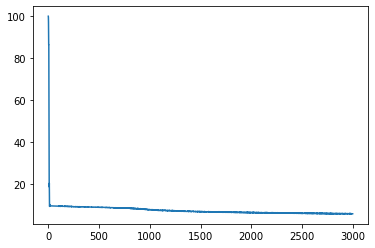

In [8]:
vals = loss_hist.history['val_mean_absolute_percentage_error']
plt.plot(np.arange(0,len(vals)),vals,'-')
plt.show()

In [9]:
ys_predictions = simple_model.predict(Xs_val)
penalty(ys_val, ys_predictions).numpy()

0.10964448

In [10]:
mape = tf.keras.losses.MeanAbsolutePercentageError()
error = mape(ys_predictions, ys_val).numpy()
error

5.601855

## RUE'S CODE

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import pylab
import math

from scipy import stats

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline

### Linking Dataset from Google Drive

In [12]:
# load data into Pandas
#files = ["/content/drive/My Drive/Colab Notebooks/Sydney_Data.csv"]
csvfile = open(files[0])
sydney_df = pd.read_csv(csvfile, 
                        names = ['X1','X2','X3','X4',
                                 'X5','X6','X7','X8',
                                 'X9','X10','X11','X12',
                                 'X13','X14','X15','X16',
                                 'Y1','Y2','Y3','Y4',
                                 'Y5','Y6','Y7','Y8',
                                 'Y9','Y10','Y11','Y12',
                                 'Y13','Y14','Y15','Y16',
                                 'P1','P2','P3','P4',
                                 'P5','P6','P7','P8',
                                 'P9','P10','P11','P12',
                                 'P13','P14','P15','P16',
                                 'P_total'])
sydney_df

#files = ["/content/drive/My Drive/Colab Notebooks/Adelaide_Data.csv"]
csvfile = open(files[0])
adelaide_df = pd.read_csv(csvfile, 
                        names = ['X1','X2','X3','X4',
                                 'X5','X6','X7','X8',
                                 'X9','X10','X11','X12',
                                 'X13','X14','X15','X16',
                                 'Y1','Y2','Y3','Y4',
                                 'Y5','Y6','Y7','Y8',
                                 'Y9','Y10','Y11','Y12',
                                 'Y13','Y14','Y15','Y16',
                                 'P1','P2','P3','P4',
                                 'P5','P6','P7','P8',
                                 'P9','P10','P11','P12',
                                 'P13','P14','P15','P16',
                                 'P_total'])

##files = ["/content/drive/My Drive/Colab Notebooks/Perth_Data.csv"]
csvfile = open(files[0])
perth_df = pd.read_csv(csvfile, 
                        names = ['X1','X2','X3','X4',
                                 'X5','X6','X7','X8',
                                 'X9','X10','X11','X12',
                                 'X13','X14','X15','X16',
                                 'Y1','Y2','Y3','Y4',
                                 'Y5','Y6','Y7','Y8',
                                 'Y9','Y10','Y11','Y12',
                                 'Y13','Y14','Y15','Y16',
                                 'P1','P2','P3','P4',
                                 'P5','P6','P7','P8',
                                 'P9','P10','P11','P12',
                                 'P13','P14','P15','P16',
                                 'P_total'])

#files = ["/content/drive/My Drive/Colab Notebooks/Tasmania_Data.csv"]
csvfile = open(files[0])
tasmania_df = pd.read_csv(csvfile, 
                        names = ['X1','X2','X3','X4',
                                 'X5','X6','X7','X8',
                                 'X9','X10','X11','X12',
                                 'X13','X14','X15','X16',
                                 'Y1','Y2','Y3','Y4',
                                 'Y5','Y6','Y7','Y8',
                                 'Y9','Y10','Y11','Y12',
                                 'Y13','Y14','Y15','Y16',
                                 'P1','P2','P3','P4',
                                 'P5','P6','P7','P8',
                                 'P9','P10','P11','P12',
                                 'P13','P14','P15','P16',
                                 'P_total'])

In [13]:
# set data type of data frame
sydney_df = sydney_df.astype(float)

# check for missing values (if any)
display(sydney_df.head())

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,P8,P9,P10,P11,P12,P13,P14,P15,P16,P_total
0,127.9439,264.9656,68.3481,521.7570,443.6997,195.9648,166.7701,504.2850,104.0226,205.2257,...,92861.7375,84584.2549,89041.0312,87204.4296,97380.7385,94753.7880,81677.9764,103129.6938,97196.8128,1463622.174
1,500.4677,278.6497,47.4062,417.3653,551.7083,401.1797,0.0000,161.7773,368.1543,45.9850,...,83029.8436,91483.7433,93748.1139,99467.6415,95935.6597,84254.7876,93786.3095,94499.4790,88941.7152,1489888.502
2,511.7510,104.4383,566.0000,380.4079,345.8587,0.0000,90.5588,7.2899,566.0000,566.0000,...,91309.1752,107598.5159,101897.2685,100876.0477,79350.0981,100060.2964,92733.9494,100646.9126,83394.8729,1495035.934
3,19.6990,216.4378,355.2960,67.8151,518.7256,72.1572,222.7933,223.9242,566.0000,312.4474,...,92083.6042,103182.5412,80688.8463,92306.4190,106440.6778,102118.7041,99295.1266,96503.3818,77942.2947,1459841.498
4,0.0000,0.0000,243.3420,0.0000,566.0000,0.0000,198.4878,0.0000,566.0000,566.0000,...,85602.1738,98370.5585,97148.3728,95775.0777,80723.5930,95865.7812,88525.7698,94546.5417,85021.1027,1475765.923


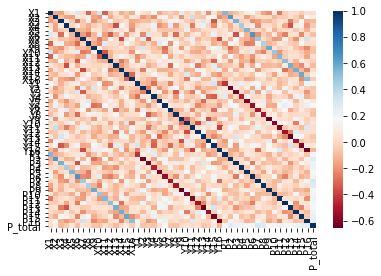

In [14]:
# check for multicollinearity
## this may be an issue since P_total is proportional to the individual Ps
# correlation matrix of data frame
corr = sydney_df.corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, cmap = "RdBu")

### Multivariate Regression

In [15]:
# define input and output variables
X = sydney_df[['X1','X2','X3','X4','X5','X6','X7','X8',
               'X9','X10','X11','X12','X13','X14','X15','X16',
               'Y1','Y2','Y3','Y4','Y5','Y6','Y7','Y8',
               'Y9','Y10','Y11','Y12','Y13','Y14','Y15','Y16']]
Y = sydney_df[['P1','P2','P3','P4','P5','P6','P7','P8',
               'P9','P10','P11','P12','P13','P14','P15','P16','P_total']]

# split dataset into training and validation
## chose to split like Oskar w/ first 80% for training and remaining 20% for validation
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.20)

# create model
regression_model = LinearRegression()
regression_model.fit(X_train,Y_train)


LinearRegression()

In [16]:
# get predictions
y_predict = regression_model.predict(X_test)

In [17]:
# check if P_total = sum of P from 1 to 16 in prediction
# how should we penalize the mismatch of the sum?
(abs(sum(y_predict[0:15,1]) - y_predict[0,16])/y_predict[0,16])*100


5.893723284662836

In [18]:
# print(regression_model.coef_)
# print(regression_model.intercept_)

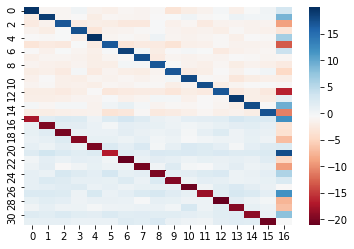

In [19]:
# this is kind of good for visualizing the coefficient matrix instead of printing it out?
sns.heatmap(np.transpose(regression_model.coef_), cmap = "RdBu")

## CLAIRE'S CODE

#### Adelaide

'----------------------------------------------------------------------------------------------------'

X1         False
X2         False
X3         False
X4         False
X5         False
X6         False
X7         False
X8         False
X9         False
X10        False
X11        False
X12        False
X13        False
X14        False
X15        False
X16        False
Y1         False
Y2         False
Y3         False
Y4         False
Y5         False
Y6         False
Y7         False
Y8         False
Y9         False
Y10        False
Y11        False
Y12        False
Y13        False
Y14        False
Y15        False
Y16        False
P1         False
P2         False
P3         False
P4         False
P5         False
P6         False
P7         False
P8         False
P9         False
P10        False
P11        False
P12        False
P13        False
P14        False
P15        False
P16        False
P_total    False
dtype: bool

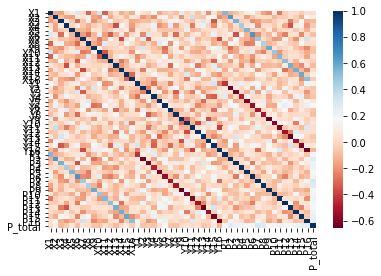

In [20]:
# for Adelaide

adelaide_df  = adelaide_df.astype(float)
display("-"*100)
display(adelaide_df.isnull().any())

corr = adelaide_df.corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, cmap = "RdBu")

X = adelaide_df[['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13','X14','X15','X16','Y1','Y2','Y3','Y4','Y5','Y6','Y7','Y8', 'Y9','Y10','Y11','Y12','Y13','Y14','Y15','Y16']]
Y = adelaide_df[['P1','P2','P3','P4','P5','P6','P7','P8','P9','P10','P11','P12','P13','P14','P15','P16','P_total']]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.20)

train = LinearRegression().fit(X_train,Y_train)

# print (train.score(X_train, Y_train))
# print (train.coeff_)
# print (train.intercept_)
# print (train.predict(X_test))

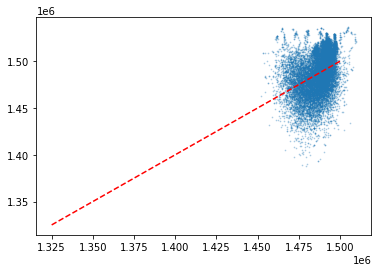

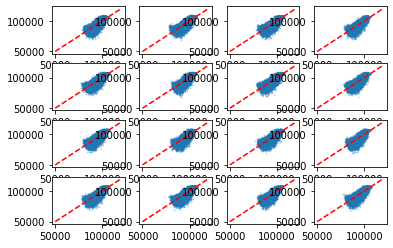

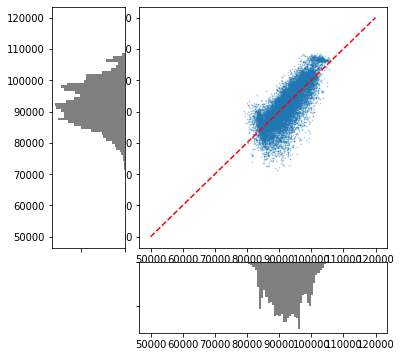

In [21]:
observed_data = np.concatenate((X_test, Y_test), axis = 1)
predicted_data = np.concatenate((X_test, train.predict(X_test)), axis = 1)

observed_df = pd.DataFrame(observed_data,
                           columns = ['X1','X2','X3','X4',
                                 'X5','X6','X7','X8',
                                 'X9','X10','X11','X12',
                                 'X13','X14','X15','X16',
                                 'Y1','Y2','Y3','Y4',
                                 'Y5','Y6','Y7','Y8',
                                 'Y9','Y10','Y11','Y12',
                                 'Y13','Y14','Y15','Y16',
                                 'P1','P2','P3','P4',
                                 'P5','P6','P7','P8',
                                 'P9','P10','P11','P12',
                                 'P13','P14','P15','P16',
                                 'P_total'])
predicted_df = pd.DataFrame(predicted_data,
                            columns = ['X1','X2','X3','X4',
                                 'X5','X6','X7','X8',
                                 'X9','X10','X11','X12',
                                 'X13','X14','X15','X16',
                                 'Y1','Y2','Y3','Y4',
                                 'Y5','Y6','Y7','Y8',
                                 'Y9','Y10','Y11','Y12',
                                 'Y13','Y14','Y15','Y16',
                                 'P1','P2','P3','P4',
                                 'P5','P6','P7','P8',
                                 'P9','P10','P11','P12',
                                 'P13','P14','P15','P16',
                                 'P_total'])

# plot of P_total
t = np.linspace(1325000,1500000, num = 2)
plt.scatter(predicted_df['P_total'], observed_df['P_total'], alpha = 0.3, s = 0.5)
plt.plot(t,t,'r--')
plt.show()

# plots of P1 - P16
# so the model is way better at predicting individual power outputs than the total
# (if you look at the coefficient matrix, it is assigning drastically different weights
# to the x and y coordinates even though, in theory, each WEC contributes equally to P_total)

t = np.linspace(50000,120000, num = 2)
for i in range (1,17):
  plt.subplot(4,4,i)
  plt.scatter(predicted_df['P'+str(i)], observed_df['P'+str(i)], alpha = 0.3, s = 0.5)
  plt.plot(t,t,'r--')
plt.show()

fig = plt.figure(figsize = (6, 6))
grid = plt.GridSpec(4, 4, hspace = 0.2, wspace = 0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels = [], sharey = main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels = [], sharex = main_ax)

# this plot is weird but it shows that we have a lot of data at a certain observed power output
main_ax.scatter(predicted_df['P10'], observed_df['P10'], alpha = 0.3, s = 0.5)
main_ax.plot(t,t,'r--')
x_hist.hist(predicted_df['P10'], 40, histtype = 'stepfilled', orientation = 'vertical', color = 'gray')
x_hist.invert_yaxis()
y_hist.hist(observed_df['P10'], 40, histtype = 'stepfilled', orientation = 'horizontal', color = 'gray')
y_hist.invert_xaxis()
# print(np.sqrt(metrics.mean_squared_error(train.predict(X_test), Y_train)))

#### Perth

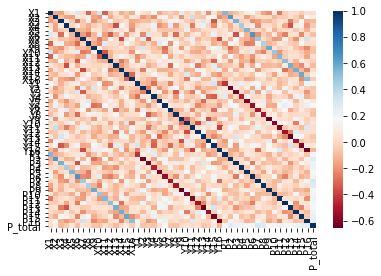

In [22]:
perth_df  = perth_df.astype(float)

corr = perth_df.corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, cmap = "RdBu")

X = perth_df[['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13','X14','X15','X16','Y1','Y2','Y3','Y4','Y5','Y6','Y7','Y8', 'Y9','Y10','Y11','Y12','Y13','Y14','Y15','Y16']]
Y = perth_df[['P1','P2','P3','P4','P5','P6','P7','P8','P9','P10','P11','P12','P13','P14','P15','P16','P_total']]


X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.20)

train = LinearRegression().fit(X_train,Y_train)

# print (train.score(X_train, Y_train))
# print (train.coeff_)
# print (train.intercept_)
# print (train.predict(X_test))

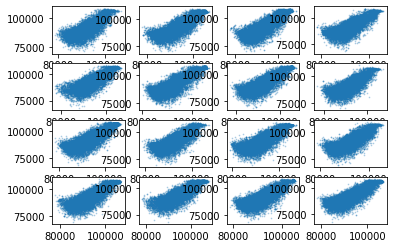

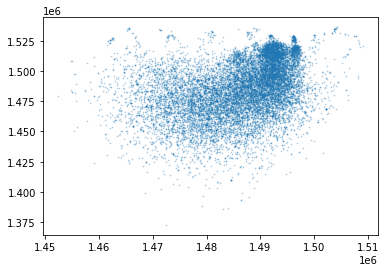

In [23]:
observed_data = np.concatenate((X_test, Y_test), axis = 1)
predicted_data = np.concatenate((X_test, train.predict(X_test)), axis = 1)

observed_df = pd.DataFrame(observed_data,
                           columns = ['X1','X2','X3','X4',
                                 'X5','X6','X7','X8',
                                 'X9','X10','X11','X12',
                                 'X13','X14','X15','X16',
                                 'Y1','Y2','Y3','Y4',
                                 'Y5','Y6','Y7','Y8',
                                 'Y9','Y10','Y11','Y12',
                                 'Y13','Y14','Y15','Y16',
                                 'P1','P2','P3','P4',
                                 'P5','P6','P7','P8',
                                 'P9','P10','P11','P12',
                                 'P13','P14','P15','P16',
                                 'P_total'])
predicted_df = pd.DataFrame(predicted_data,
                            columns = ['X1','X2','X3','X4',
                                 'X5','X6','X7','X8',
                                 'X9','X10','X11','X12',
                                 'X13','X14','X15','X16',
                                 'Y1','Y2','Y3','Y4',
                                 'Y5','Y6','Y7','Y8',
                                 'Y9','Y10','Y11','Y12',
                                 'Y13','Y14','Y15','Y16',
                                 'P1','P2','P3','P4',
                                 'P5','P6','P7','P8',
                                 'P9','P10','P11','P12',
                                 'P13','P14','P15','P16',
                                 'P_total'])

for i in range (1,17):
  plt.subplot(4,4,i)
  plt.scatter(predicted_df['P'+str(i)], observed_df['P'+str(i)], alpha = 0.3, s = 0.5)
plt.show()

plt.scatter(predicted_df['P_total'], observed_df['P_total'], alpha = 0.3, s = 0.5)
# print(np.sqrt(metrics.mean_squared_error(train.predict(X_test), Y_train)))

#### Tasmania

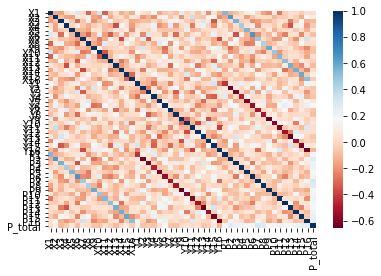

In [24]:
tasmania_df  = tasmania_df.astype(float)

corr = tasmania_df.corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, cmap = "RdBu")

X = tasmania_df[['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13','X14','X15','X16','Y1','Y2','Y3','Y4','Y5','Y6','Y7','Y8', 'Y9','Y10','Y11','Y12','Y13','Y14','Y15','Y16']]
Y = tasmania_df[['P1','P2','P3','P4','P5','P6','P7','P8','P9','P10','P11','P12','P13','P14','P15','P16','P_total']]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.20)

train = LinearRegression().fit(X_train,Y_train)

# print (train.score(X_train, Y_train))
# print (train.coeff_)
# print (train.intercept_)
# print (train.predict(X_test))

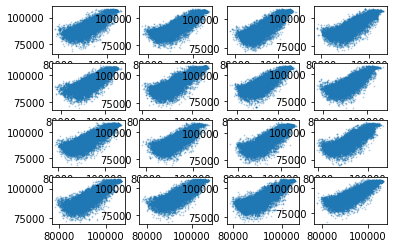

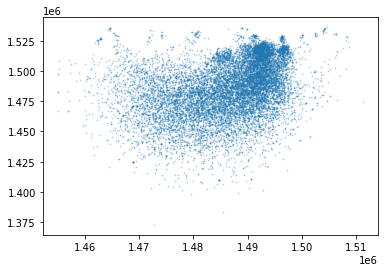

In [25]:
observed_data = np.concatenate((X_test, Y_test), axis = 1)
predicted_data = np.concatenate((X_test, train.predict(X_test)), axis = 1)

observed_df = pd.DataFrame(observed_data,
                           columns = ['X1','X2','X3','X4',
                                 'X5','X6','X7','X8',
                                 'X9','X10','X11','X12',
                                 'X13','X14','X15','X16',
                                 'Y1','Y2','Y3','Y4',
                                 'Y5','Y6','Y7','Y8',
                                 'Y9','Y10','Y11','Y12',
                                 'Y13','Y14','Y15','Y16',
                                 'P1','P2','P3','P4',
                                 'P5','P6','P7','P8',
                                 'P9','P10','P11','P12',
                                 'P13','P14','P15','P16',
                                 'P_total'])
predicted_df = pd.DataFrame(predicted_data,
                            columns = ['X1','X2','X3','X4',
                                 'X5','X6','X7','X8',
                                 'X9','X10','X11','X12',
                                 'X13','X14','X15','X16',
                                 'Y1','Y2','Y3','Y4',
                                 'Y5','Y6','Y7','Y8',
                                 'Y9','Y10','Y11','Y12',
                                 'Y13','Y14','Y15','Y16',
                                 'P1','P2','P3','P4',
                                 'P5','P6','P7','P8',
                                 'P9','P10','P11','P12',
                                 'P13','P14','P15','P16',
                                 'P_total'])

for i in range (1,17):
  plt.subplot(4,4,i)
  plt.scatter(predicted_df['P'+str(i)], observed_df['P'+str(i)], alpha = 0.3, s = 0.5)
plt.show()

plt.scatter(predicted_df['P_total'], observed_df['P_total'], alpha = 0.3, s = 0.5)
# print(np.sqrt(metrics.mean_squared_error(train.predict(X_test), Y_train)))